<a href="https://colab.research.google.com/github/Rochakr4/CAPSTONE-PROJECT-3--Cardiovascular-Risk-Prediction/blob/main/CAPSTONE_PROJECT_3_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT 3- Cardiovascular Risk Prediction**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [1]:
#libraries used in this project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_selection import chi2
from scipy.stats import chi2, chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, recall_score, precision_score,\
 accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Mounting drive to google account
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the dataset to dataframe named 'data_df'
data_df=pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT 3- Cardiovascular Risk Prediction/data_cardiovascular_risk.csv',encoding = 'unicode_escape')

In [4]:
data_df.head()#how does the data set looklike

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
#Checking dataset info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

Here the target feature is 'TenYearCHD'

In [6]:
#Creating two variables for categorical and numerical feature for further analysis
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [7]:
#Running describe function
data_df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [8]:
#Encoding categorical features for further better analysis
data_df['sex']=np.where(data_df['sex']=='M',1,0)
data_df['is_smoking']=np.where(data_df['is_smoking']=='YES',1,0)

# NaN value handling

In [32]:
#Checking Nan Value count
data_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
chol_bucket        0
dtype: int64

For Nan value handling iam simple imputer("most_frequent") for categorical features and Knn imputer for numerical features.

In [33]:
#Implementing simple imputer on categorical features
simp_imputer = SimpleImputer(strategy="most_frequent")
simp_imputer.fit(data_df[cat_features])
data_df[cat_features]= simp_imputer.transform(data_df[cat_features])

In [34]:
#Implementing Knn imputer on numerical features
knn_imputer= KNNImputer(n_neighbors=5)
knn_imputer.fit(data_df[num_features])
data_df[num_features]= knn_imputer.transform(data_df[num_features])

In [35]:
data_df.groupby('TenYearCHD')['id'].count()

TenYearCHD
0    2879
1     511
Name: id, dtype: int64

# Exploratory Data Analysis

In exploratory data analysis the approach used is ,


*   All categorical features is analysed w.r.t each other and the target variable
*   All numerical features is analysed w.r.t each other ,target feature and categorical features 





**Analysing each categorical feature with respect to each other :**

  To understand data concerning categorical features, I used count plot and barplot(to understand percentage distribution) and analyzed each feature with respect to each other.

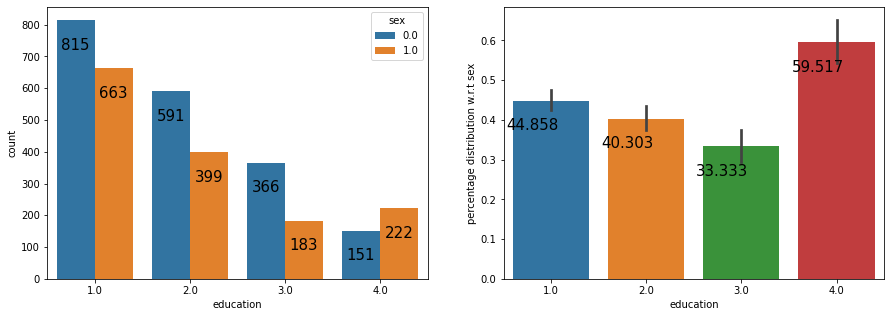

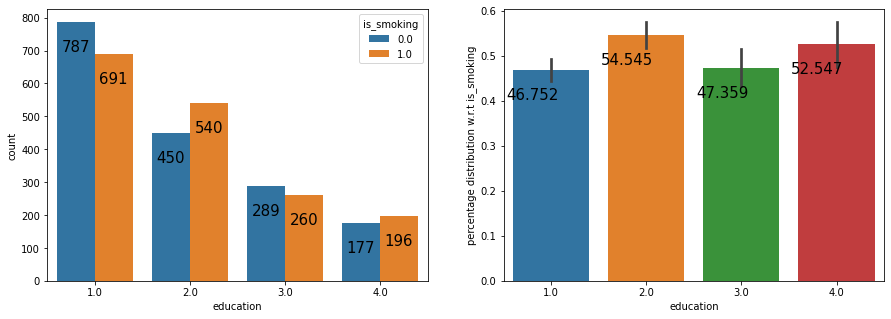

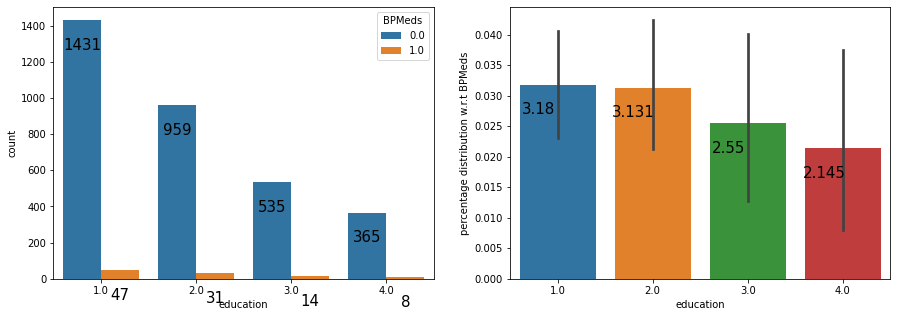

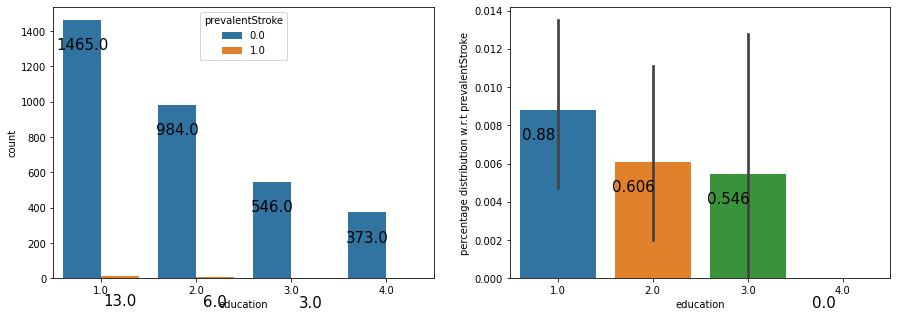

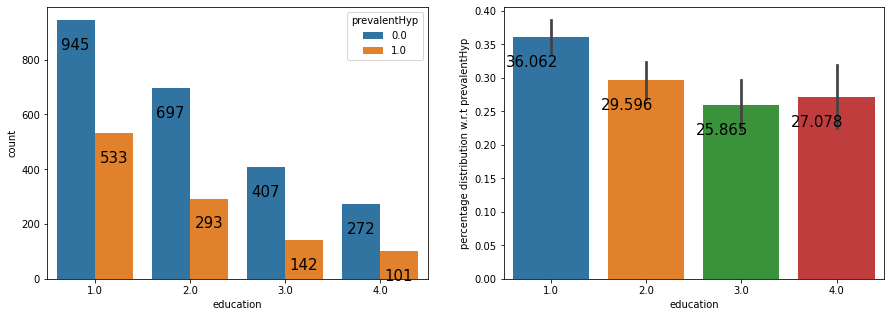

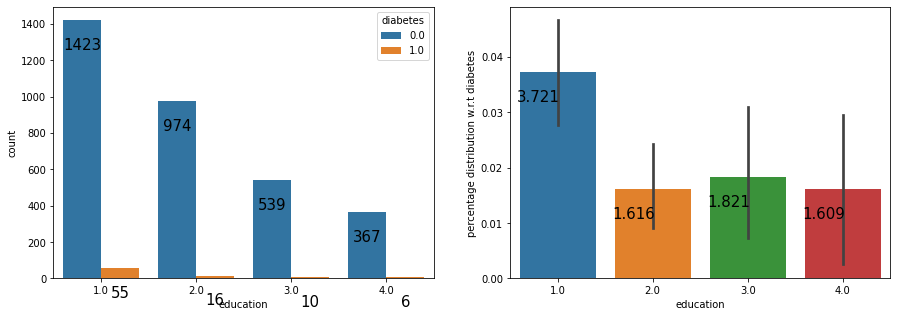

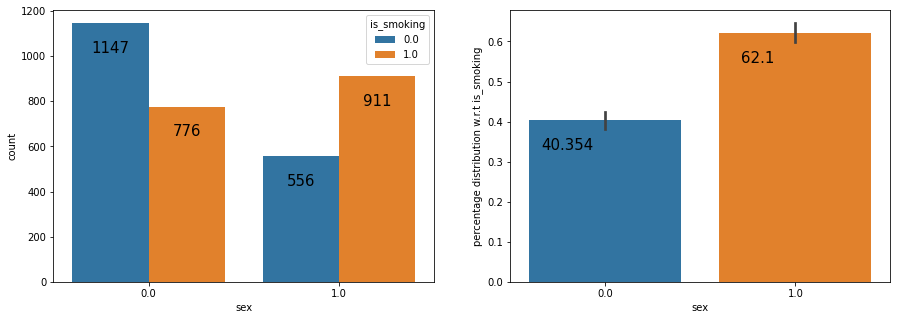

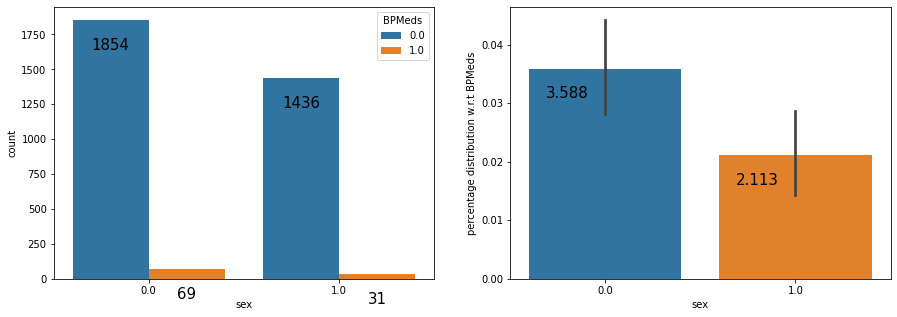

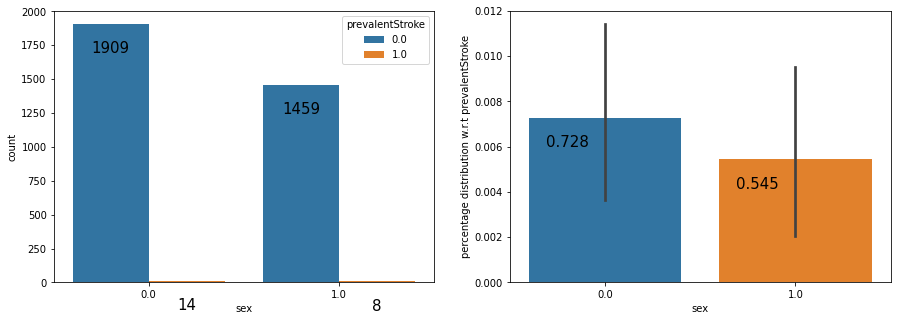

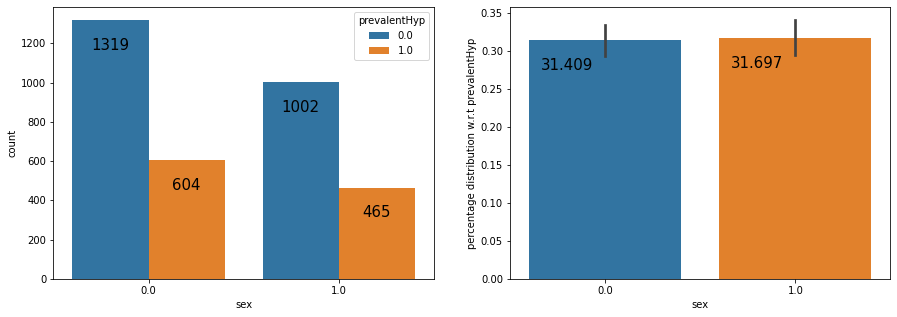

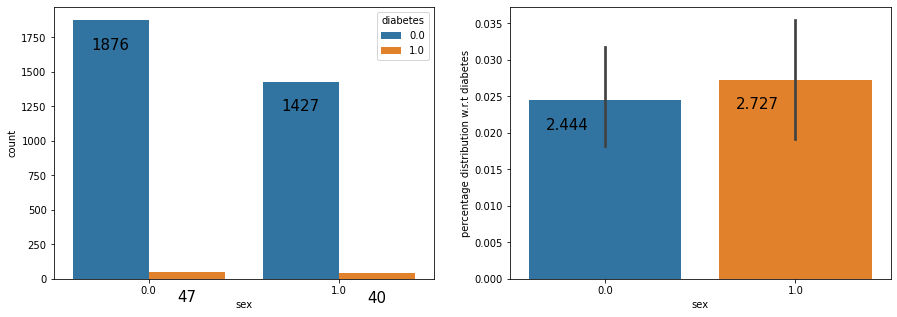

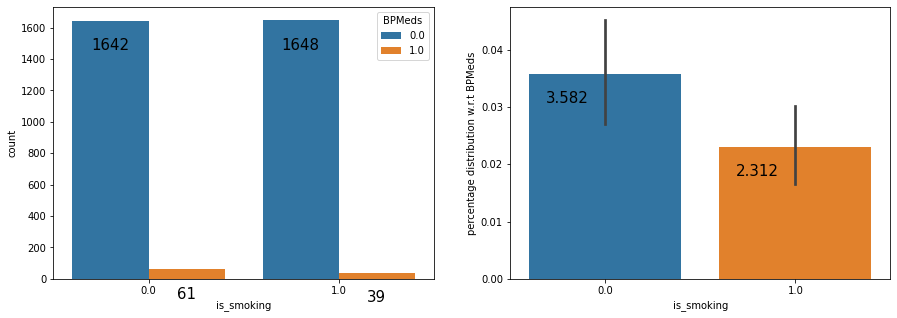

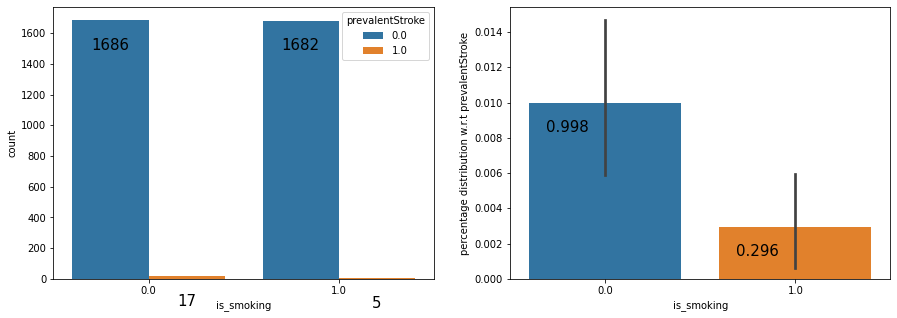

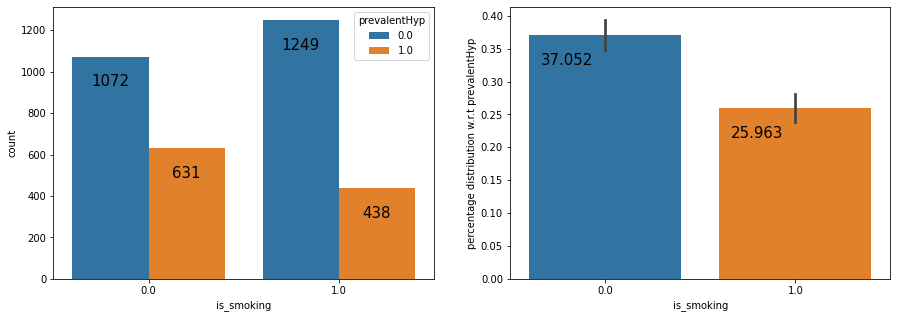

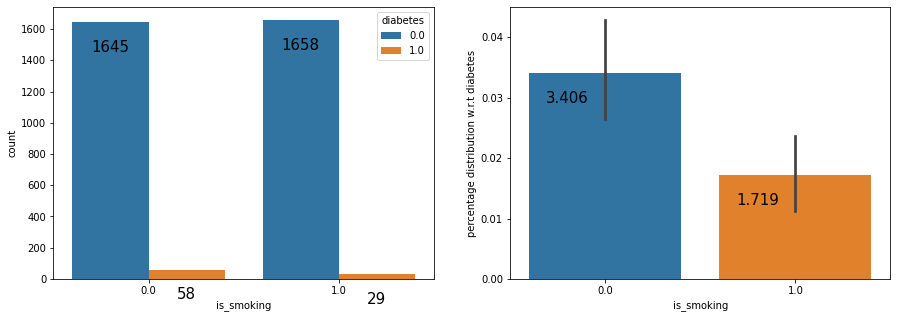

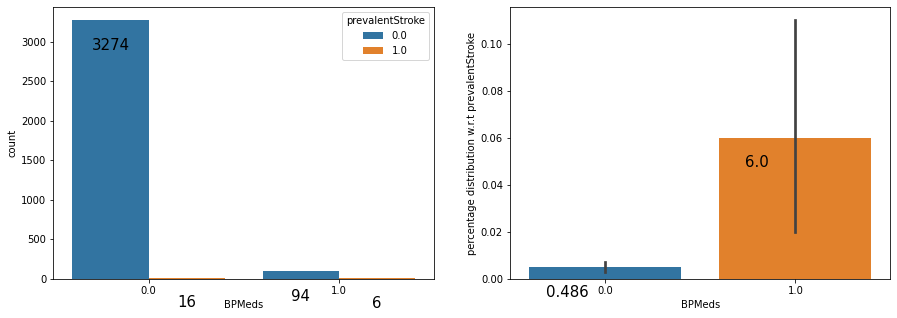

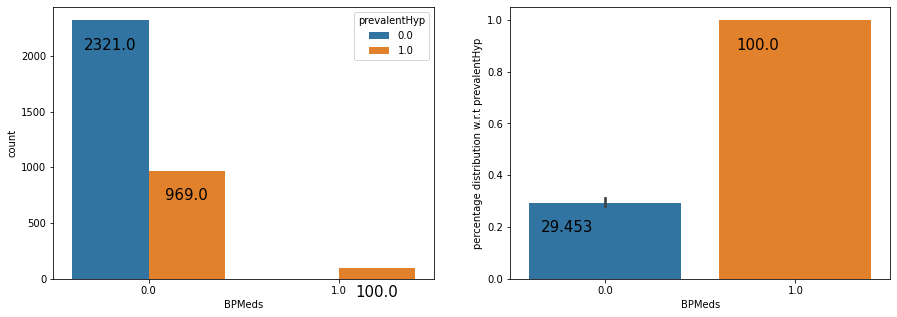

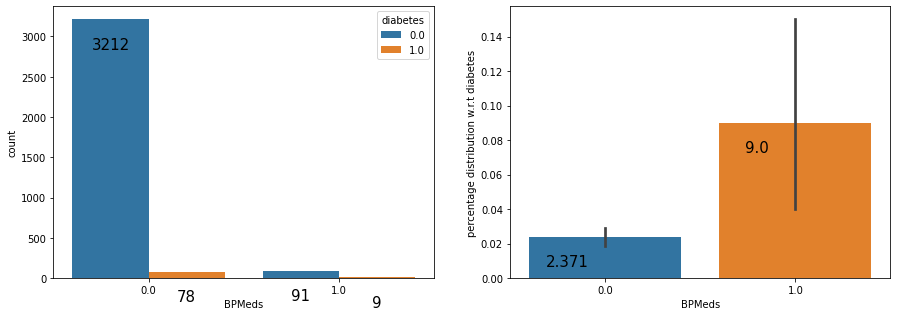

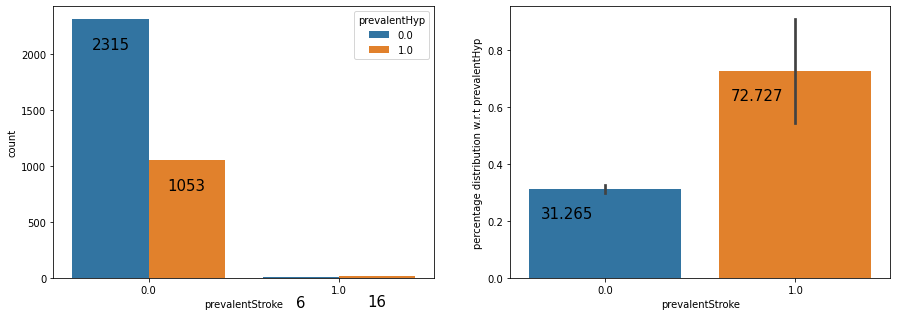

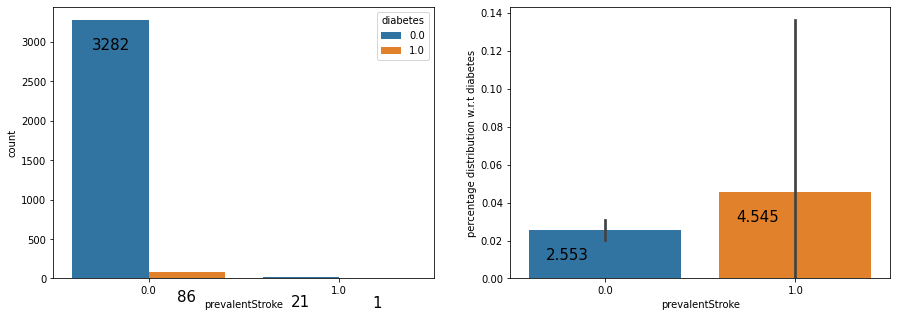

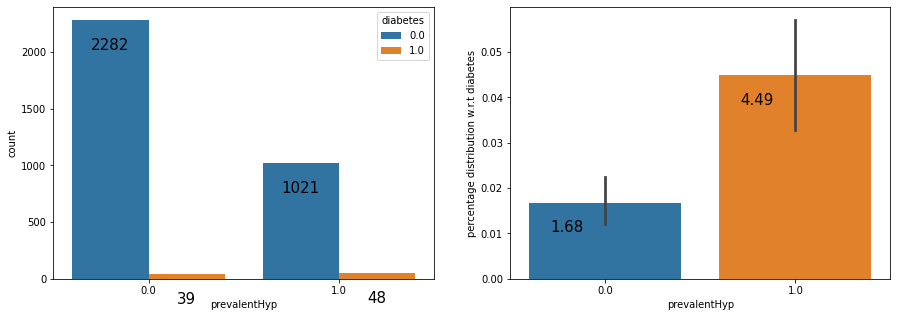

In [36]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
temp_list=['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']#creating a temp_list of categorical features to use in below coding
i=0
for v in ['education','sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  i=i+1
  for z in temp_list[i:7]:#creating for loop using temp list of categorical features to  avoid repeatation of ploting
      fig, axes = plt.subplots(1,2,figsize=(15,5))
      ch=sns.countplot(x=v,hue=z,data=data_df, ax=axes[0])#countplot
      for p in ch.patches:
           ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
      vh=sns.barplot(v,z, data = data_df, ax=axes[1])#barplot
      vh.set(ylabel=f'percentage distribution w.r.t {z}')
      for p in vh.patches:
           vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)


**REMARKS:**

below mentioned are the key insights after analysising categorical features,

*   People attaining education 1 is high followed by 2,3 and 4
*   Males in education 1, 2 and 3 are comparatively less than females, but in the case of education-4 males are comparatively high than males.
*   Around 50% of people in all education types tend to be smokers.
*   Around 30% of people in all education types tend to have hypertension.
*   37% of non-smokers tend to have hypertension issues compared to 25% of smokers.
*   People on bp medication tend to have hypertension issues as well.
*   People on bp medication tend to have a bit higher chance to be diabetic by 9%.
*   People with prevalent stroke tend to have a higher chance of 72% of hypertension issues.
*   People with prevalent hypertension tend to have a bit higher chance of being diabetic.









**Categorical features with respect to target feature :**

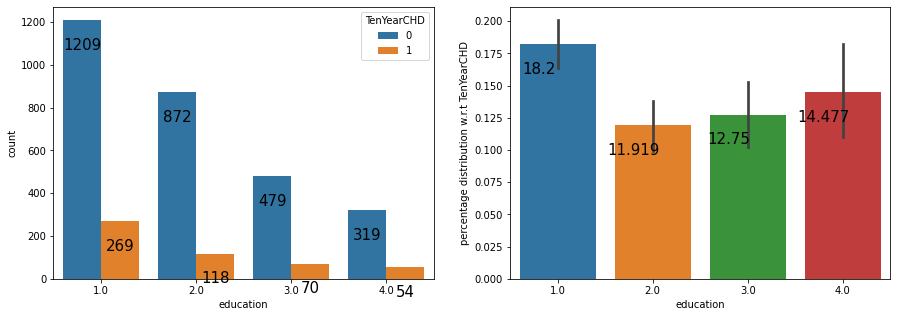

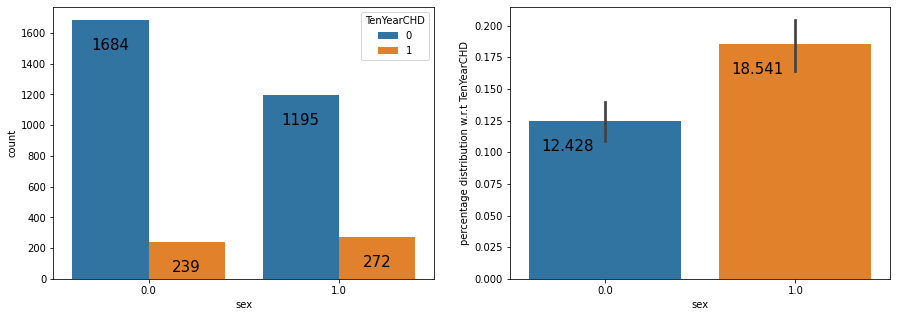

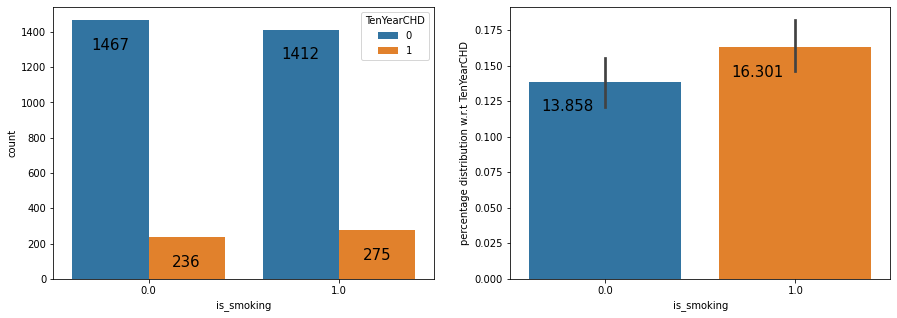

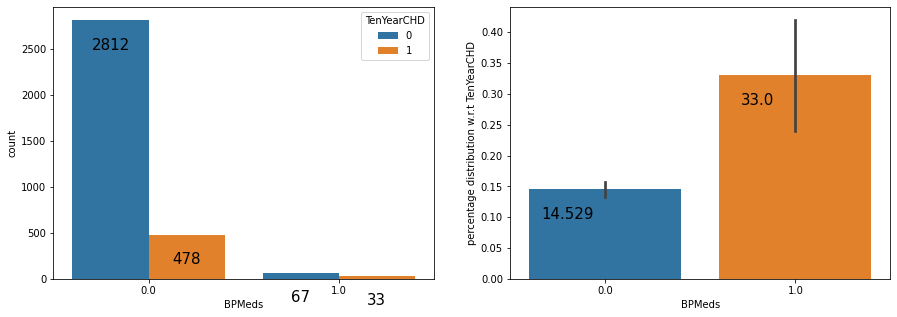

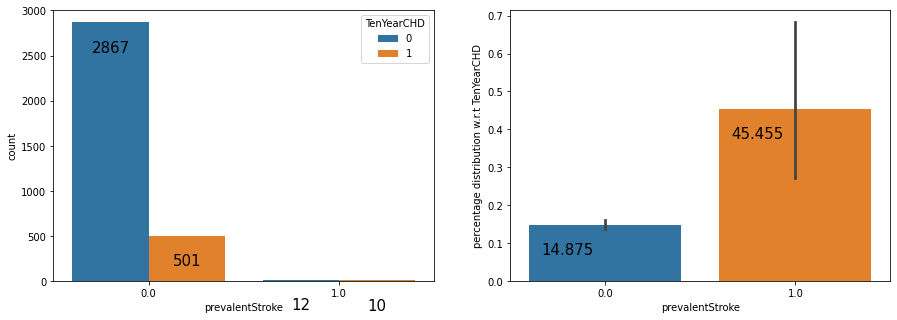

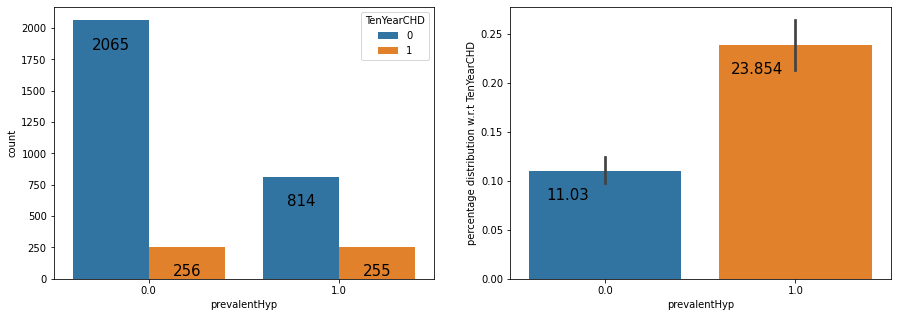

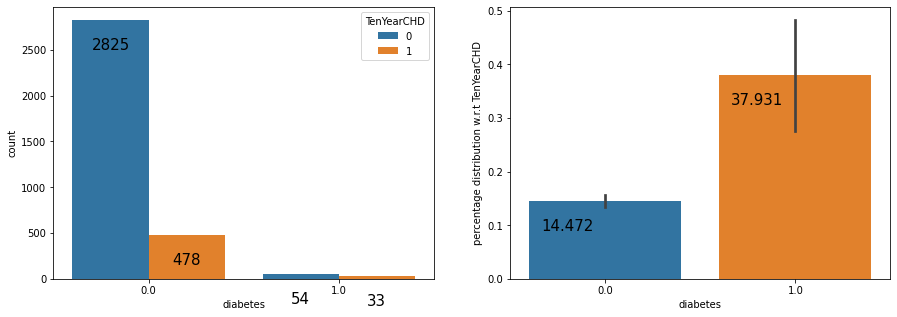

In [37]:
#ploting count plot and barplot to Analysing each categorical feature with respect to each other.
for v in cat_features:
   fig, axes = plt.subplots(1,2,figsize=(15,5))
   ch=sns.countplot(x=v,hue='TenYearCHD',data=data_df, ax=axes[0])#countplot
   for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
   vh=sns.barplot(v, 'TenYearCHD', data = data_df, ax=axes[1])#barplot
   vh.set(ylabel=f'percentage distribution w.r.t TenYearCHD')
   for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**REMARKS:**



*   Males have a bit higher chance of CHD (18.5%) compared to females (12.4%).
*   Smokers have a bit higher chance of CHD (16.3%) compared to females (13.8%).
*   People with BP medication, prevalent stroke, prevalent hypertension and/or diabetes have a higher chance of CHD compared to others.



# Numerical features

**Analysis with respect to age**

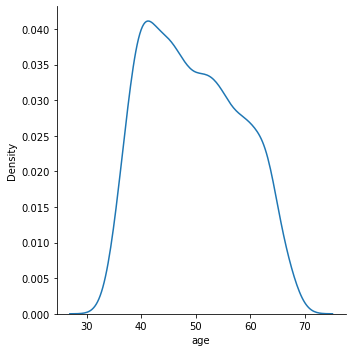

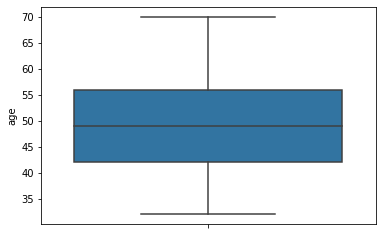

In [38]:

sns.displot(data=data_df, x='age', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='age')
plt.show()

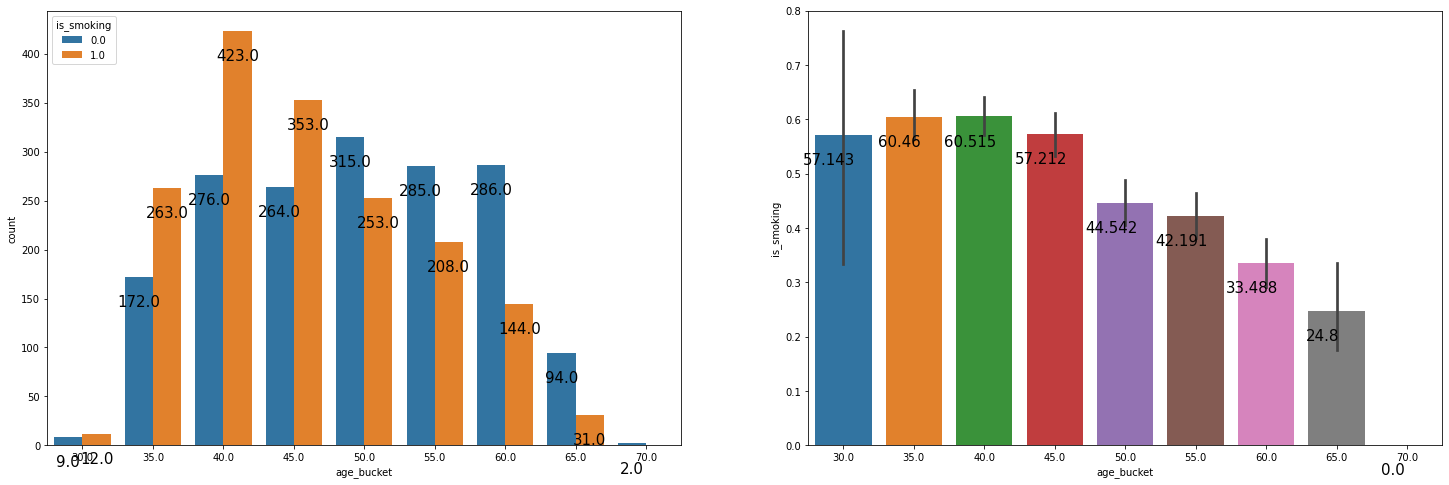

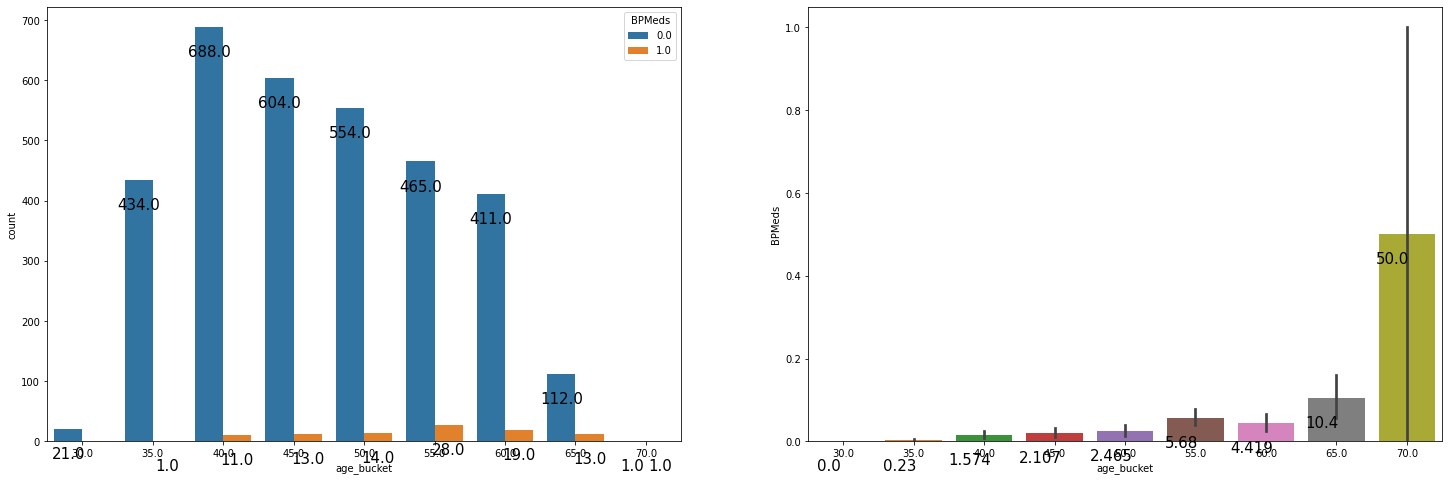

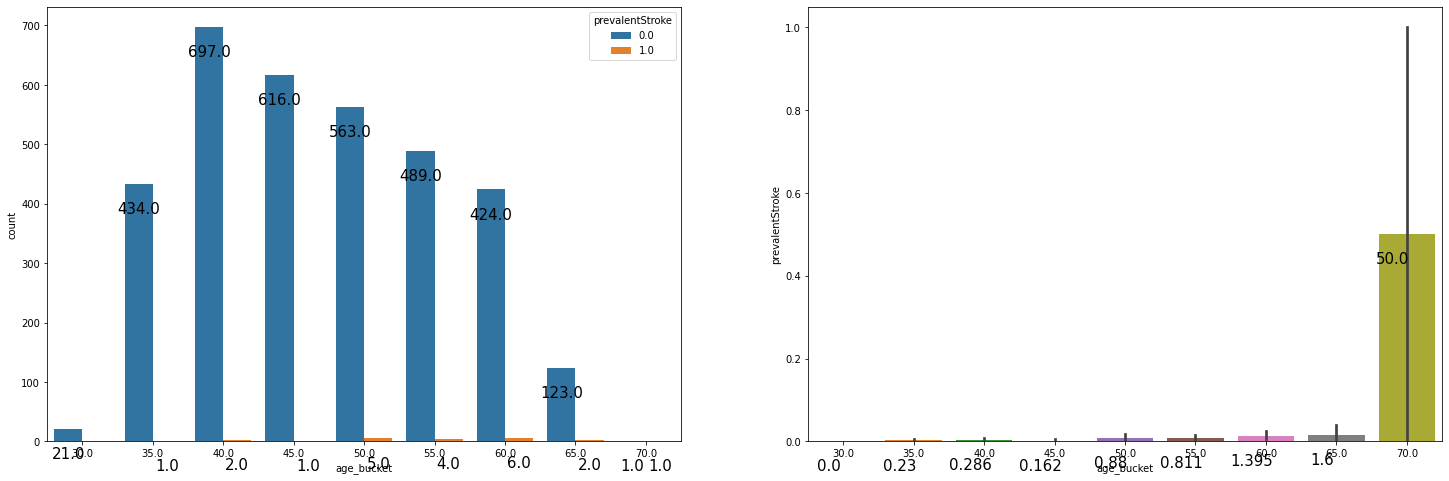

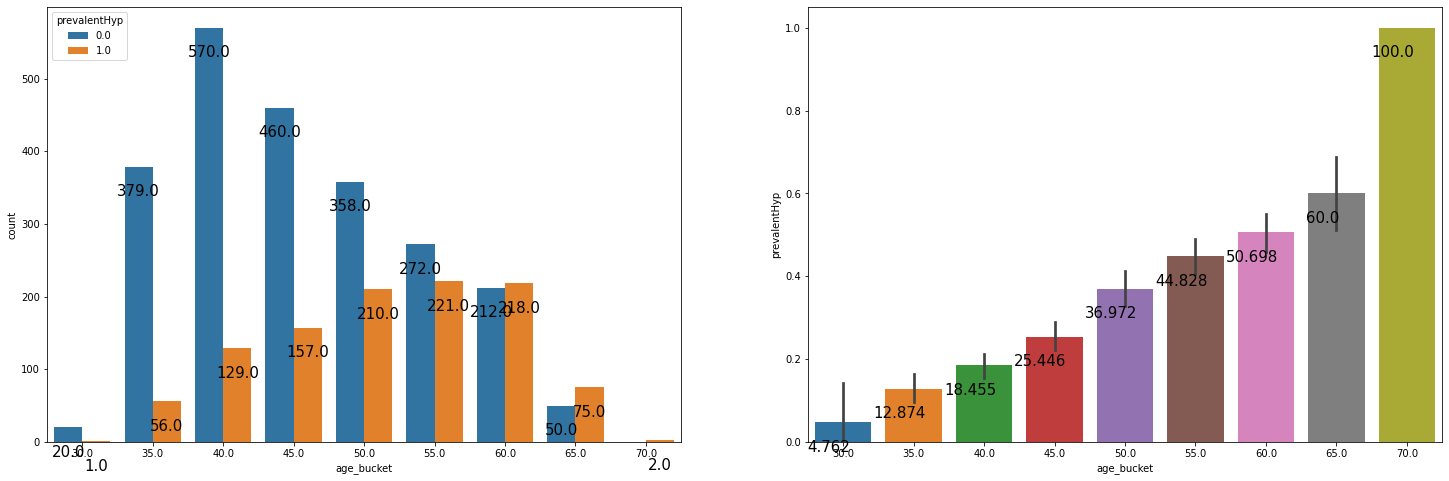

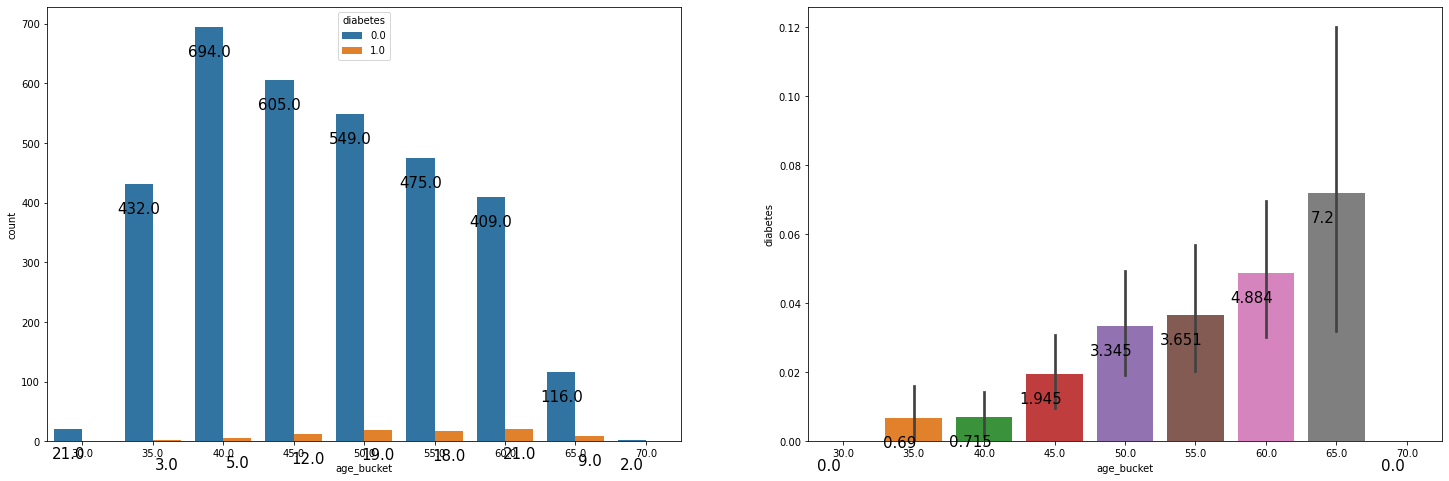

In [39]:
data_df['age_bucket'] = data_df['age'].apply(lambda x : 5*(x//5))
for v in ['is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='age_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('age_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to totChol :**

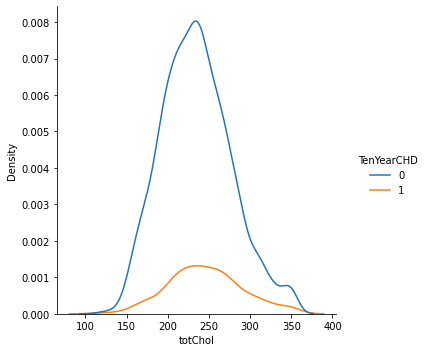

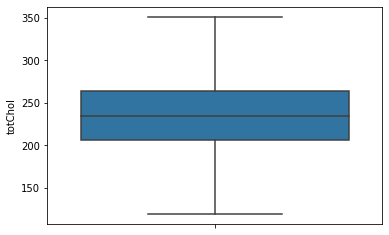

In [40]:
sns.displot(data=data_df, x='totChol', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='totChol')
plt.show()

In [41]:
vals = data_df.totChol.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['totChol'] = data_df['totChol'].apply(lambda x : min_lim if x < min_lim else x)
data_df['totChol'] = data_df['totChol'].apply(lambda x : max_lim if x > max_lim else x)

0.25    206.0
0.75    264.0
Name: totChol, dtype: float64


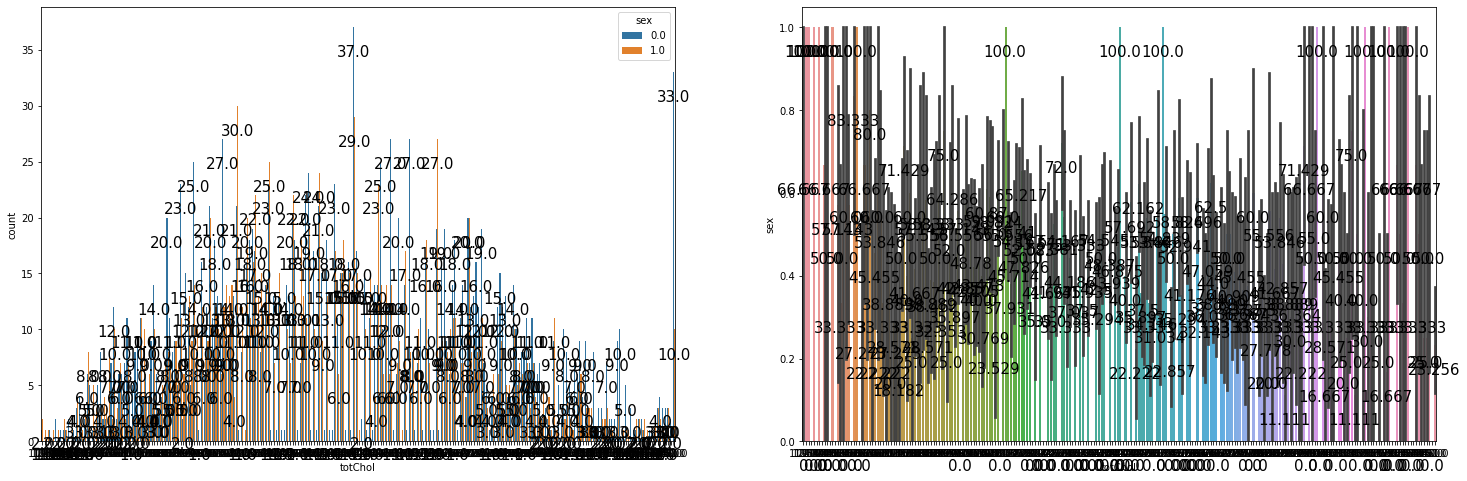

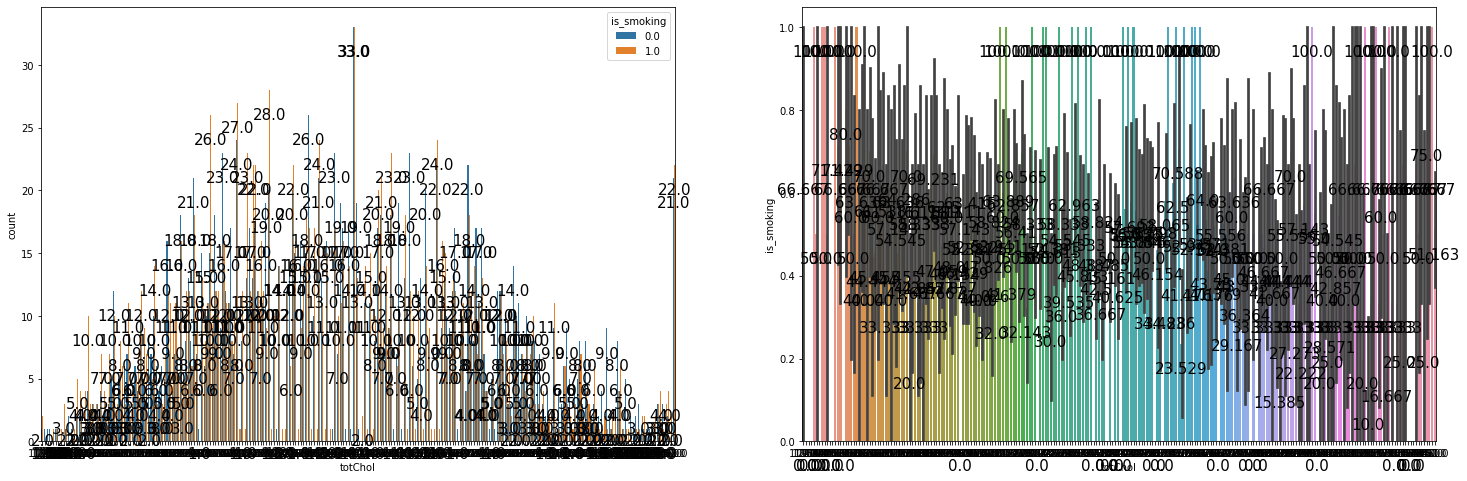

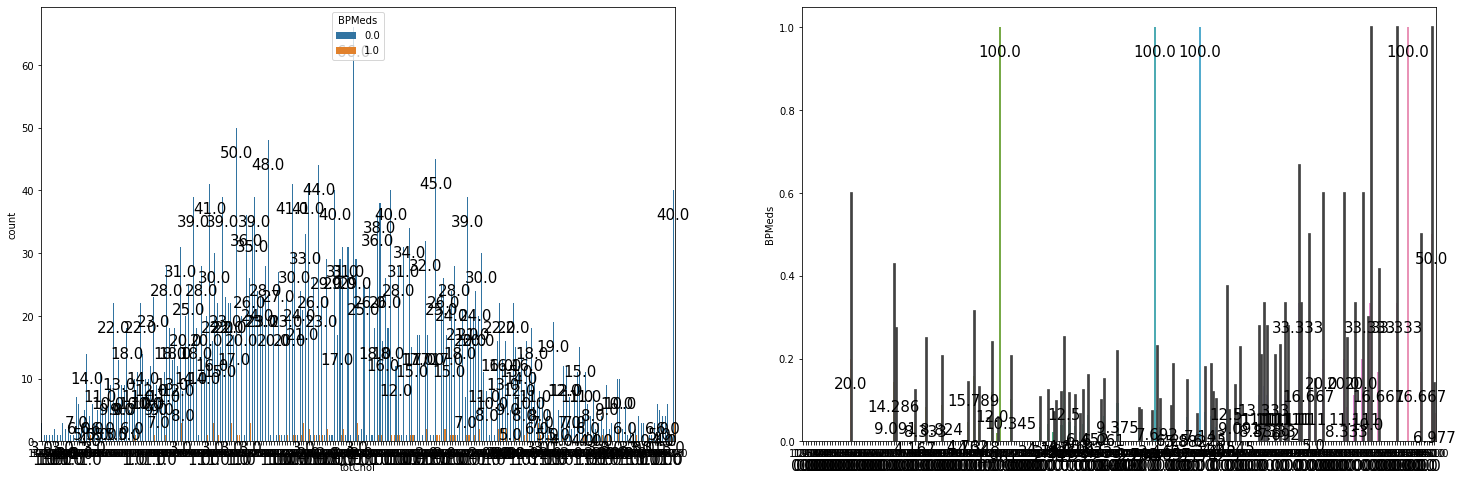

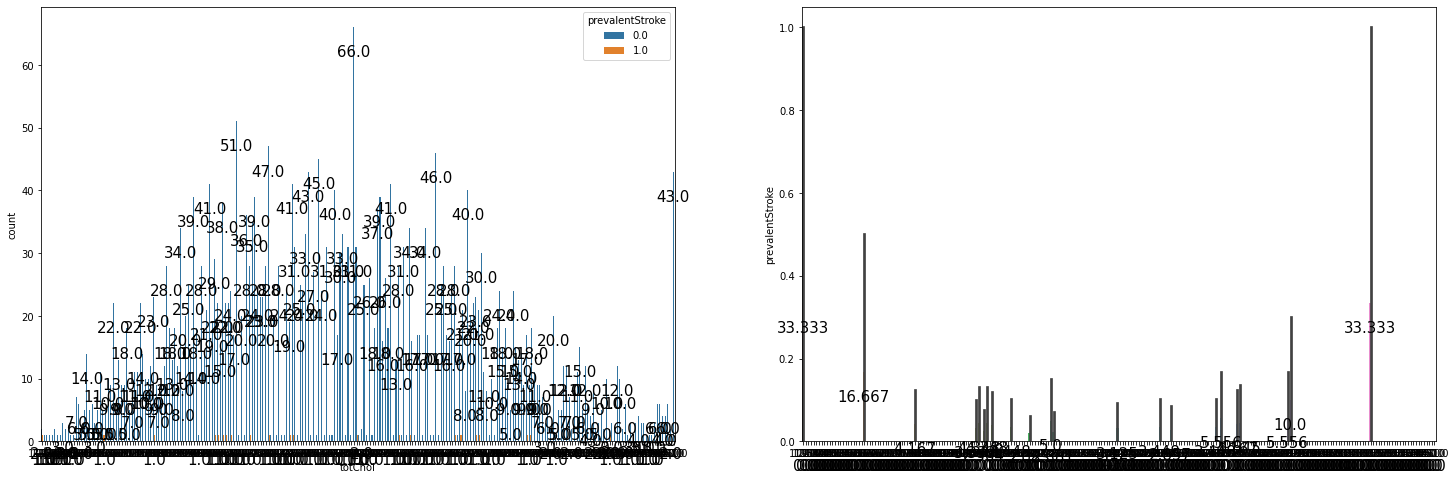

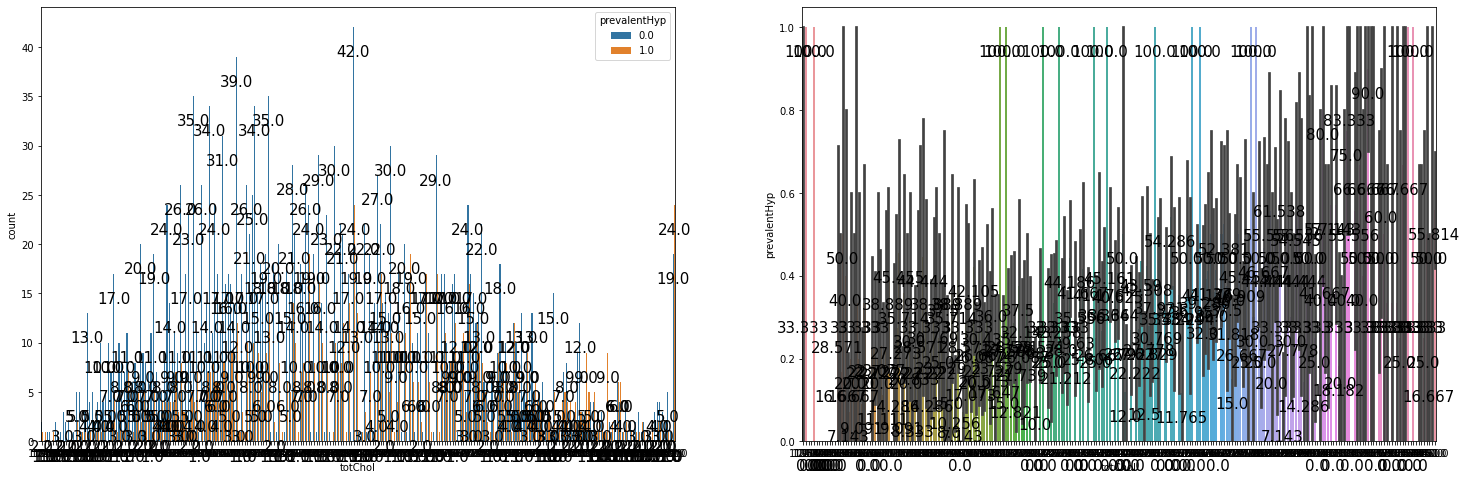

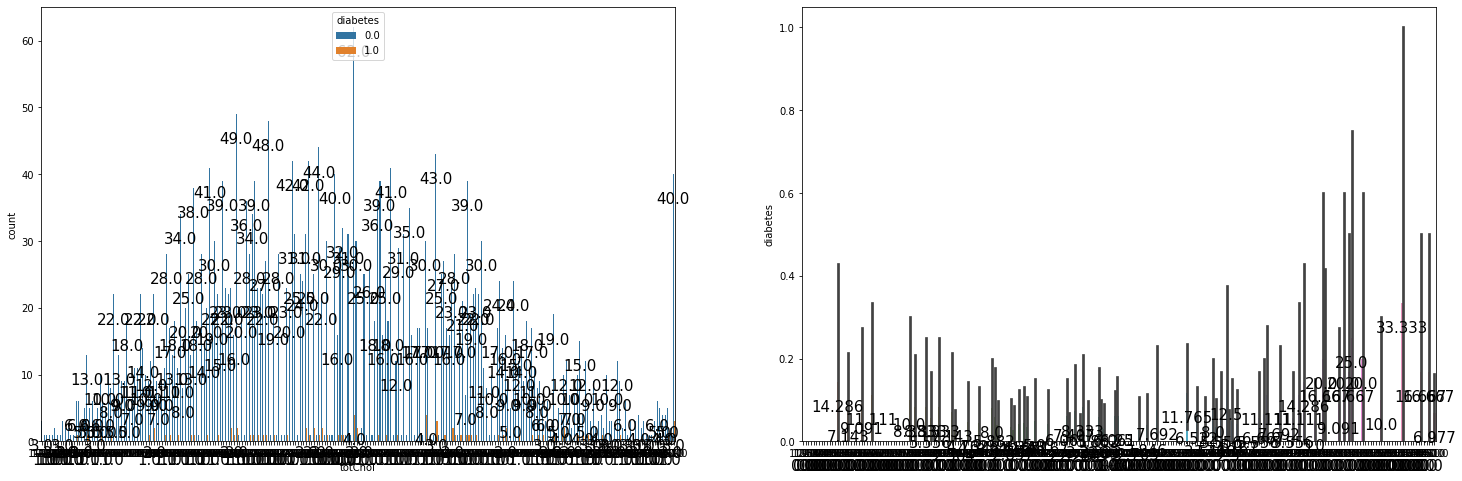

In [42]:
data_df['chol_bucket'] = data_df['totChol'].apply(lambda x : 26*(x//26))
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='totChol',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('totChol',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to cigsPerDay**

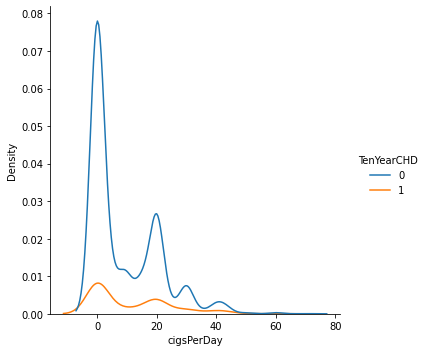

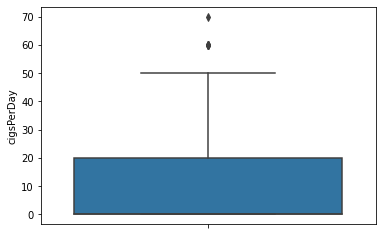

In [43]:
sns.displot(data=data_df, x='cigsPerDay', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='cigsPerDay')
plt.show()

In [44]:
vals = data_df.cigsPerDay.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['cigsPerDay'] = data_df['cigsPerDay'].apply(lambda x : min_lim if x < min_lim else x)
data_df['cigsPerDay'] = data_df['cigsPerDay'].apply(lambda x : max_lim if x > max_lim else x)

0.25     0.0
0.75    20.0
Name: cigsPerDay, dtype: float64


In [45]:
max(data_df['cigsPerDay'])-min(data_df['cigsPerDay'])

50.0

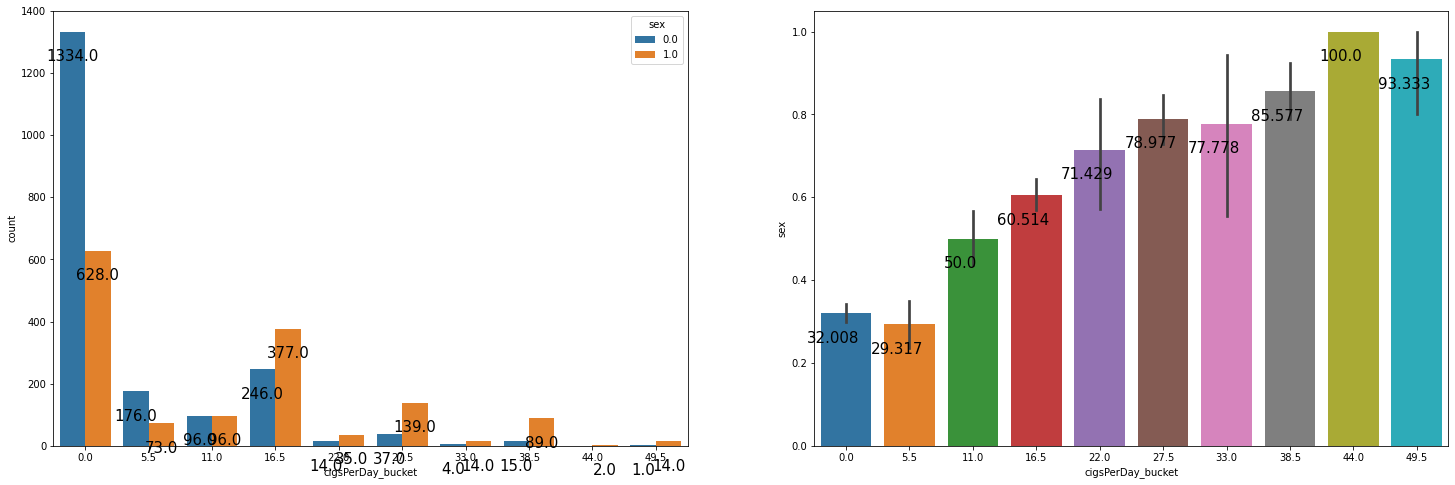

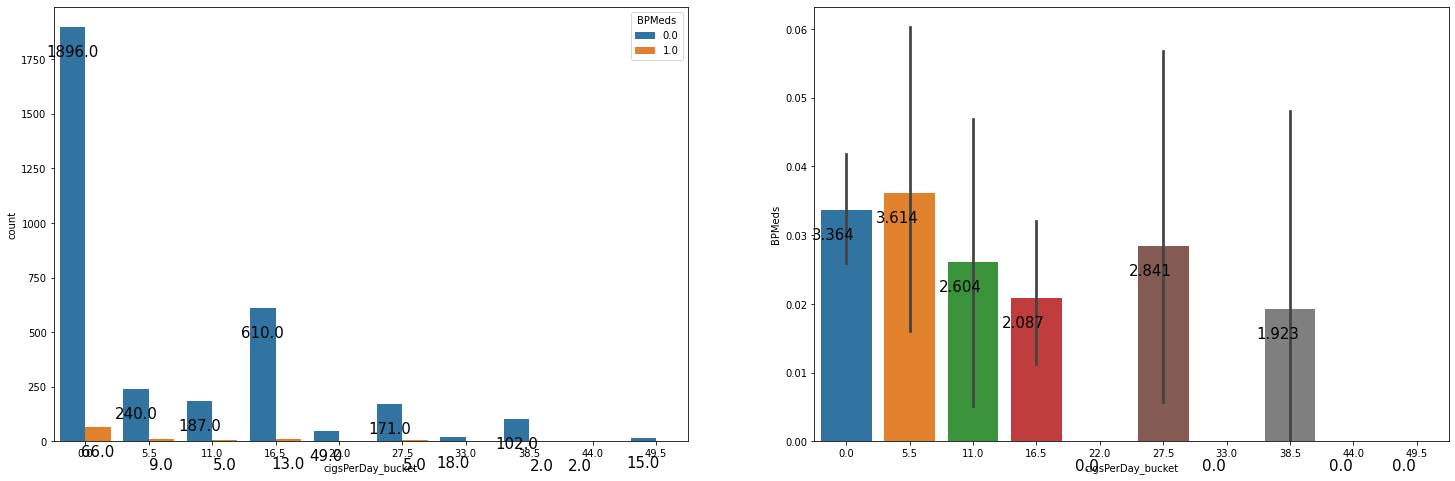

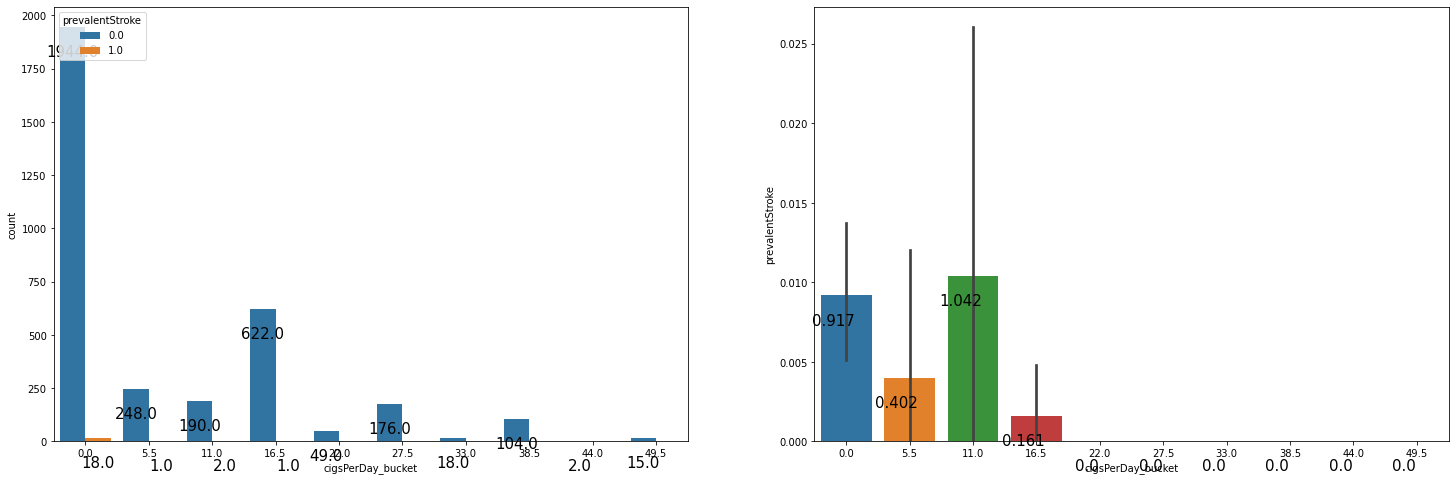

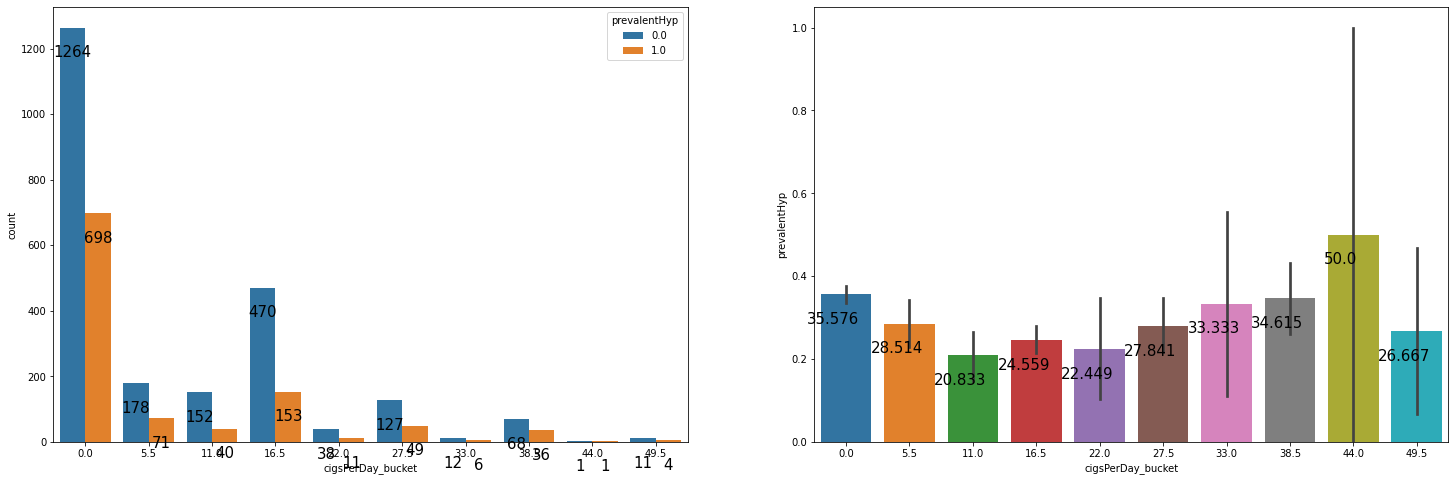

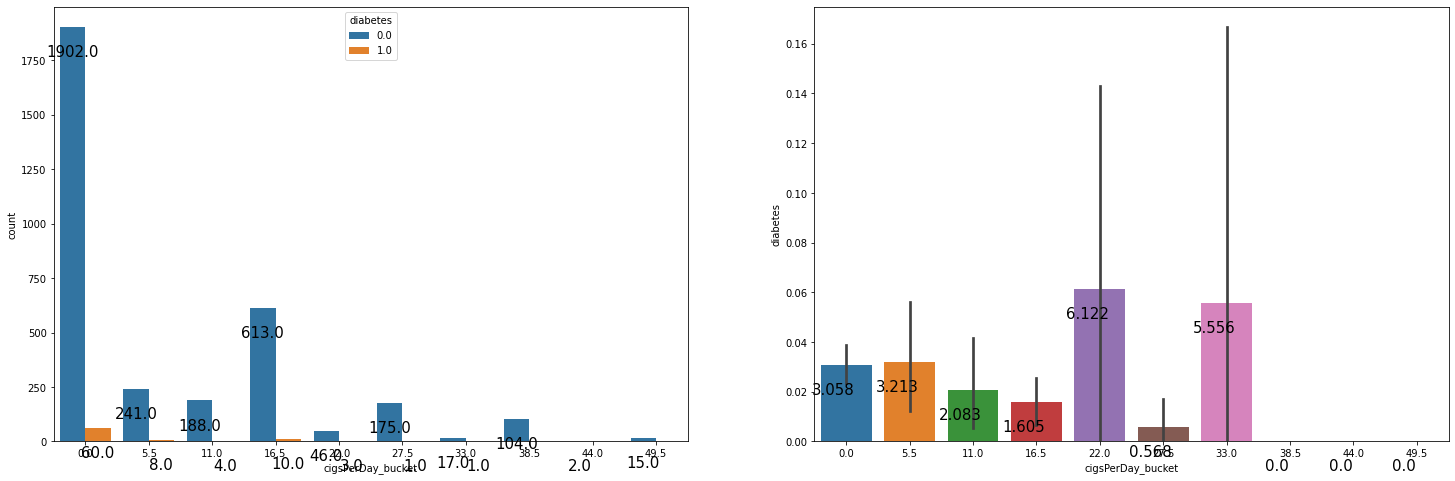

In [46]:
data_df['cigsPerDay_bucket'] = data_df['cigsPerDay'].apply(lambda x : 5.5*(x//5.5))
for v in ['sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='cigsPerDay_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('cigsPerDay_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to sysBP**

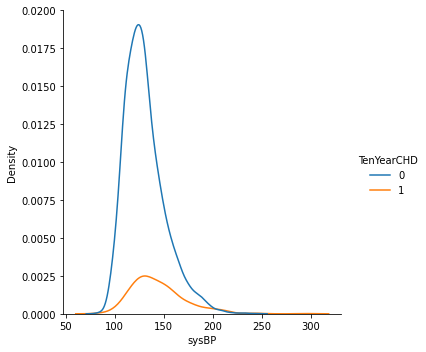

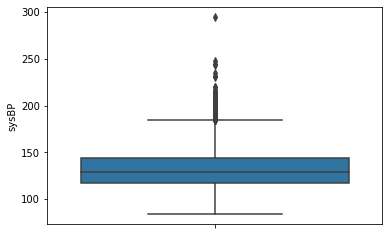

In [47]:
sns.displot(data=data_df, x='sysBP', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='sysBP')
plt.show()

In [48]:
vals = data_df.sysBP.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['sysBP'] = data_df['sysBP'].apply(lambda x : min_lim if x < min_lim else x)
data_df['sysBP'] = data_df['sysBP'].apply(lambda x : max_lim if x > max_lim else x)

0.25    117.0
0.75    144.0
Name: sysBP, dtype: float64


In [49]:
max(data_df['sysBP'])-min(data_df['sysBP'])

101.0

In [50]:
data_df['sysBP_bucket'] = data_df['sysBP'].apply(lambda x : 11*(x//11))

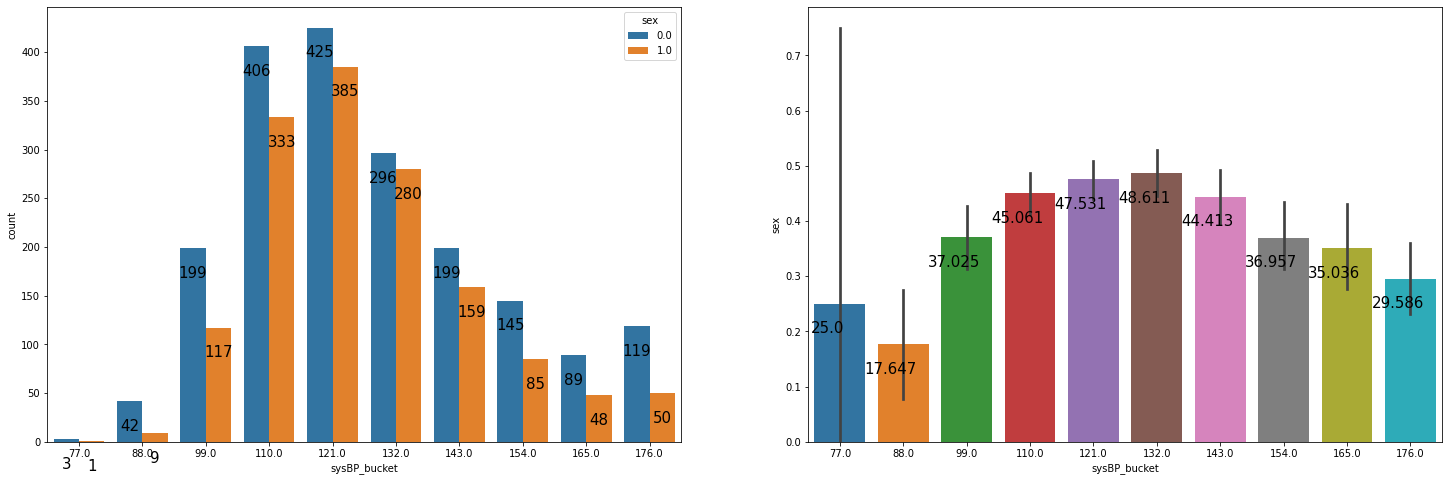

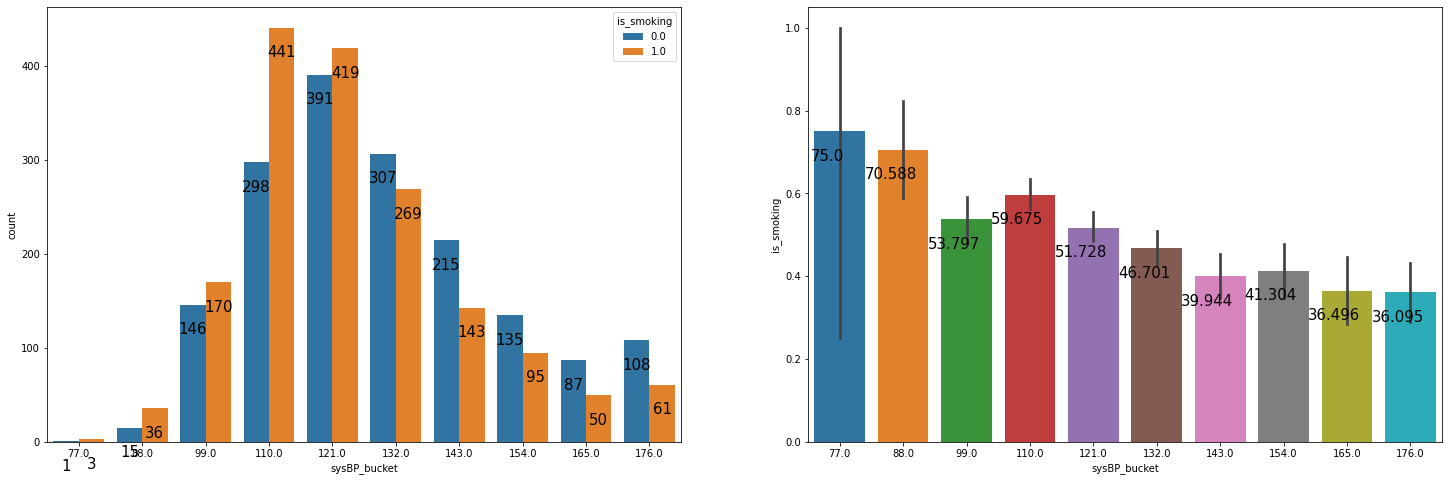

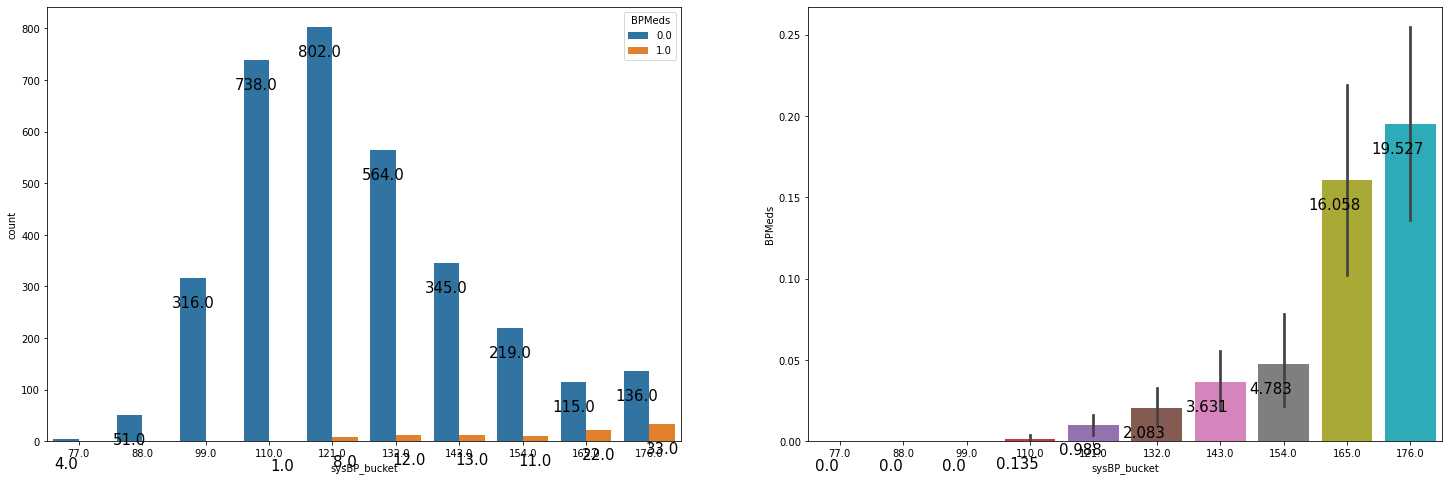

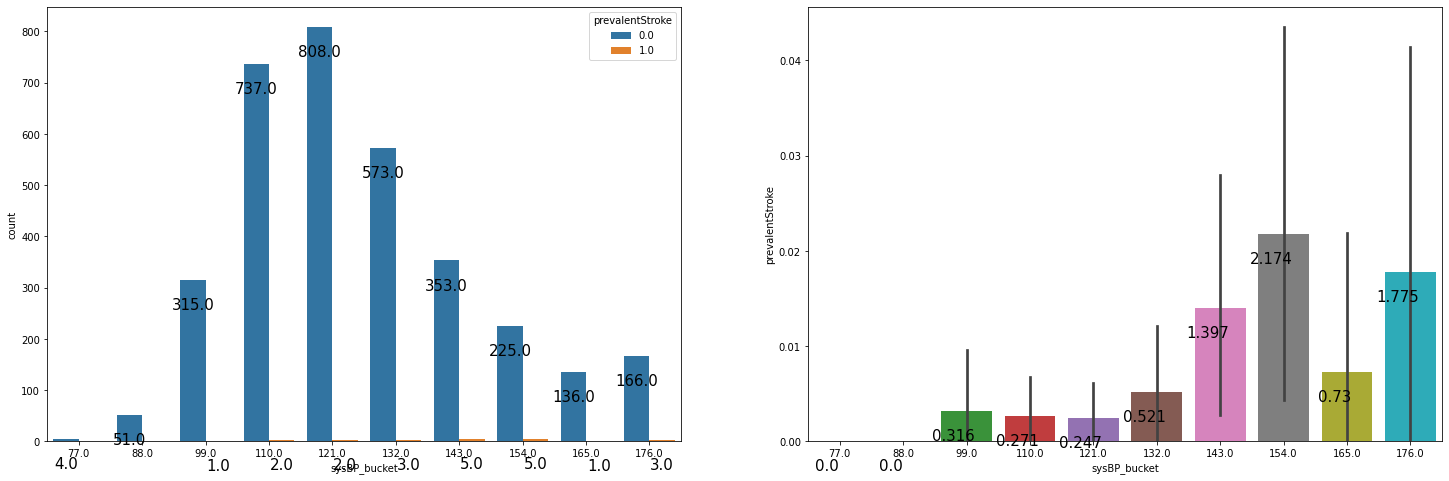

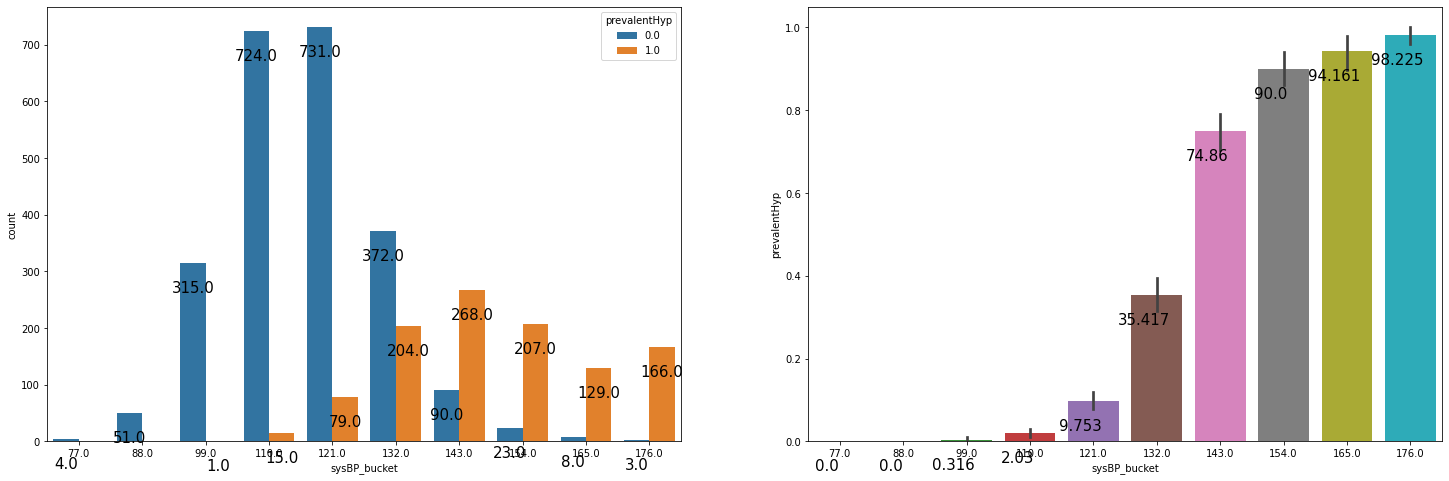

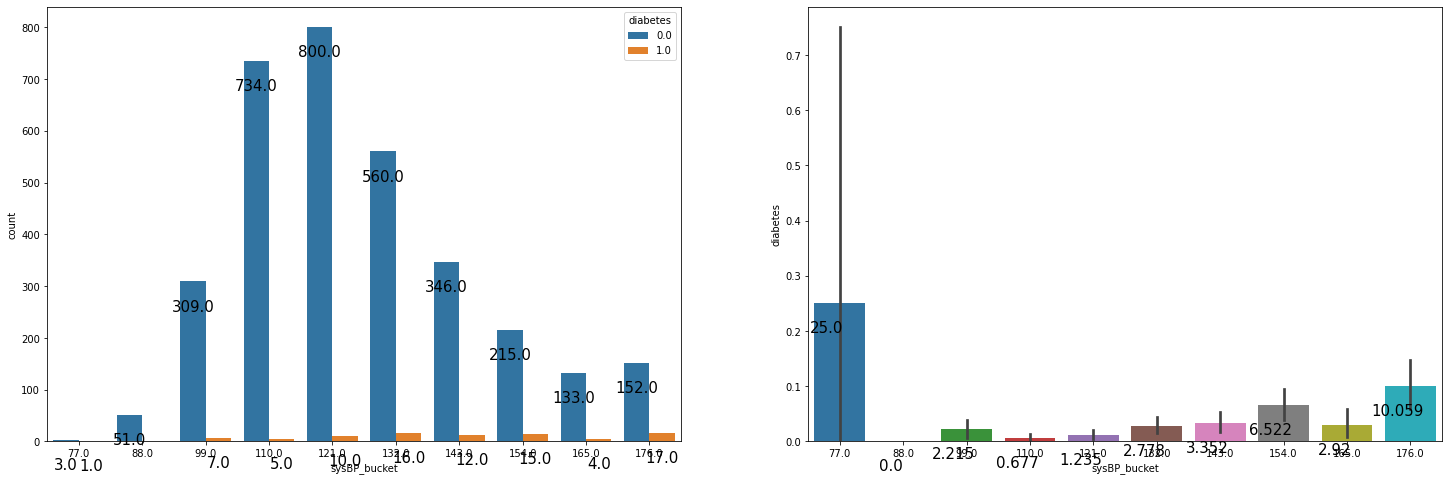

In [51]:

for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='sysBP_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('sysBP_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to diaBP**

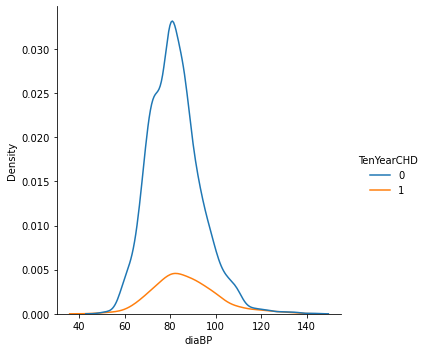

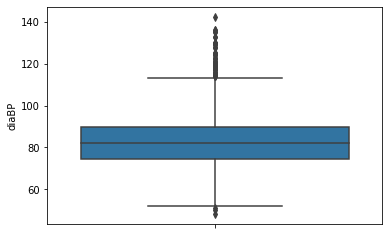

In [52]:
sns.displot(data=data_df, x='diaBP', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='diaBP')
plt.show()

In [53]:
vals = data_df.diaBP.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['diaBP'] = data_df['diaBP'].apply(lambda x : min_lim if x < min_lim else x)
data_df['diaBP'] = data_df['diaBP'].apply(lambda x : max_lim if x > max_lim else x)

0.25    74.5
0.75    90.0
Name: diaBP, dtype: float64


In [54]:
data_df['diaBP_bucket'] = data_df['diaBP'].apply(lambda x : 7*(x//7))

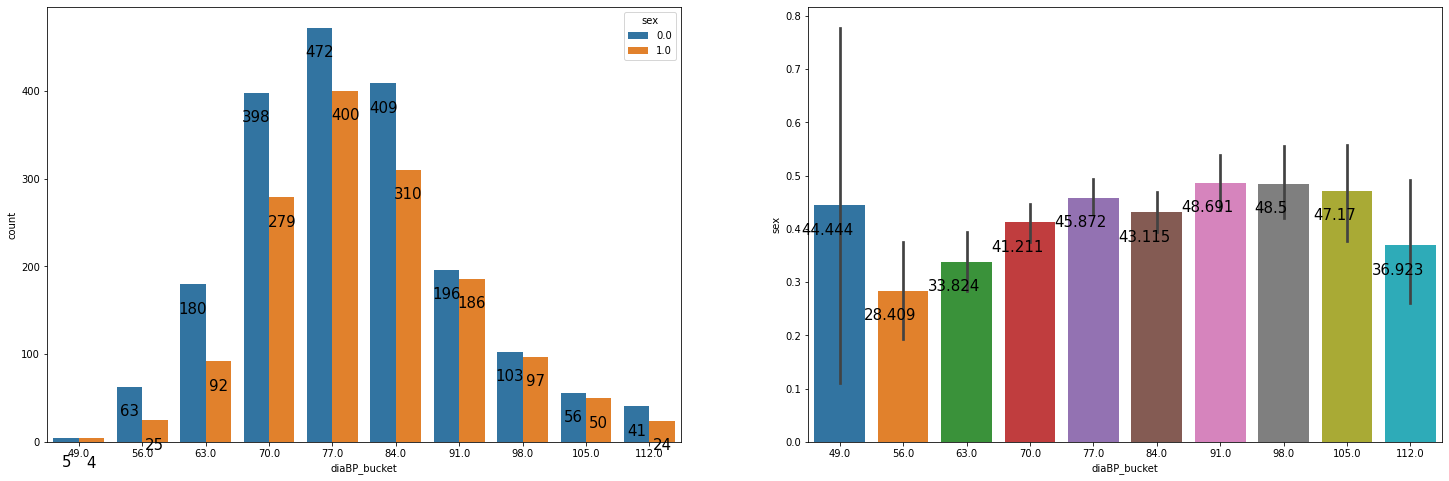

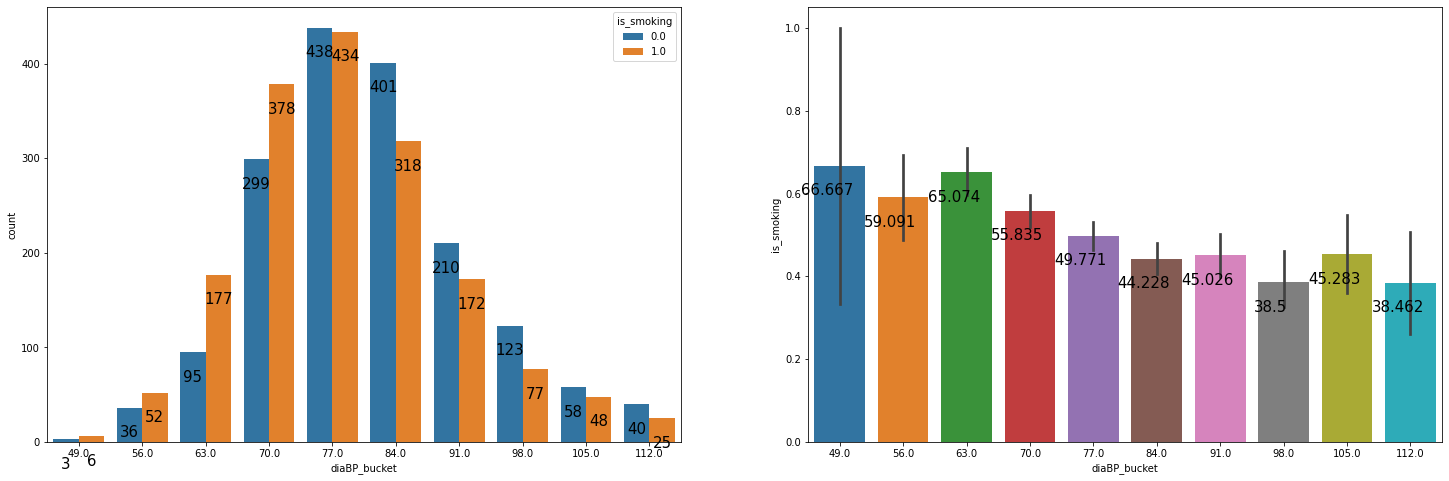

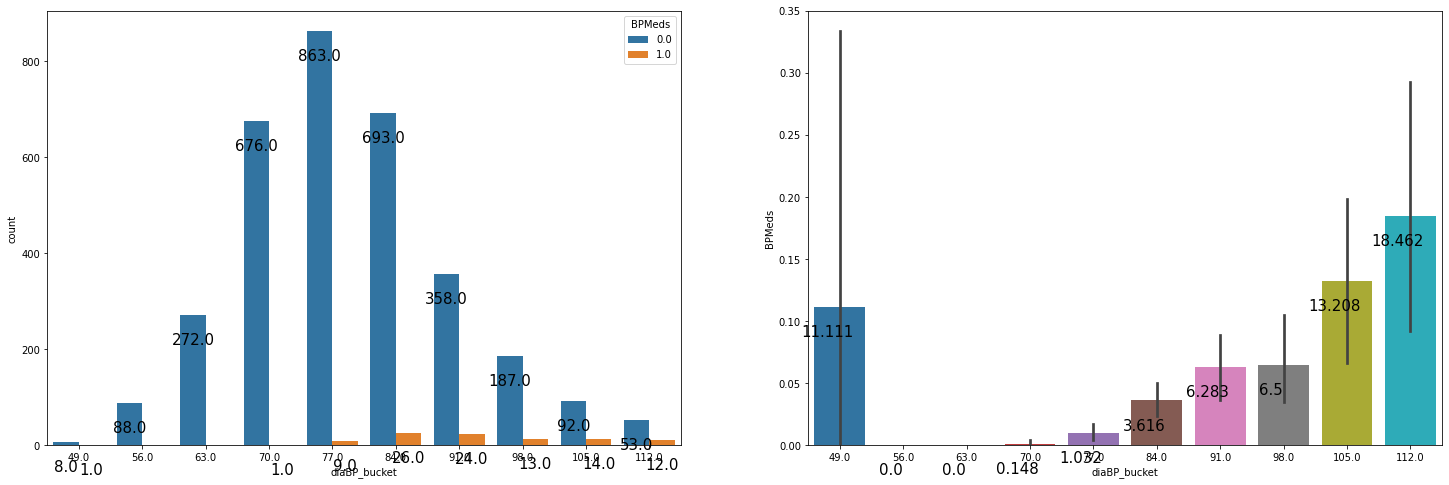

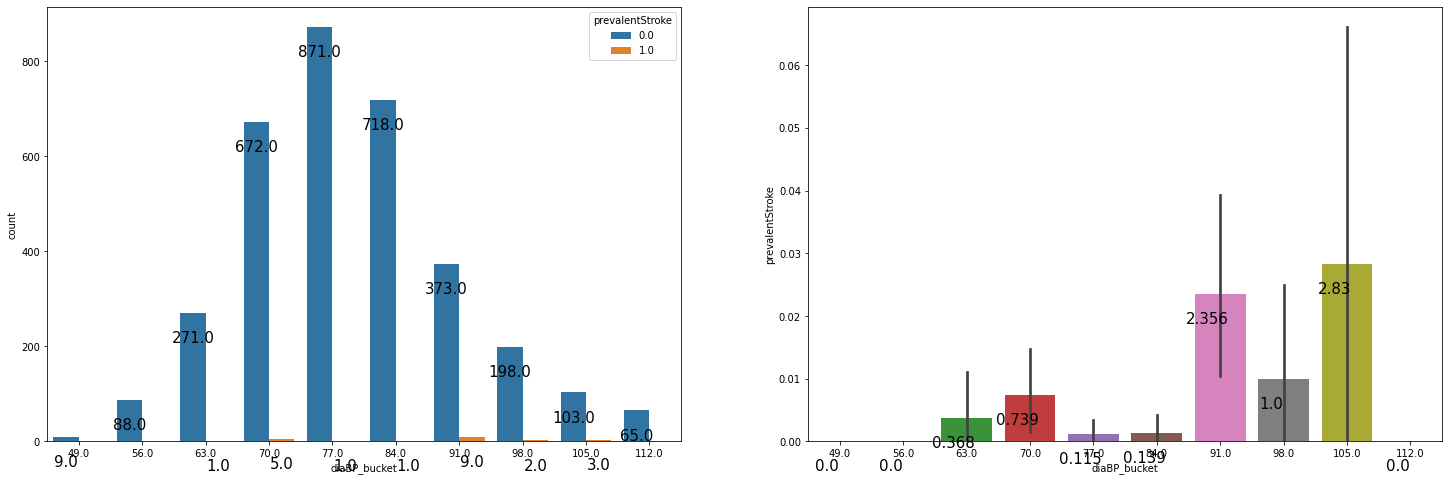

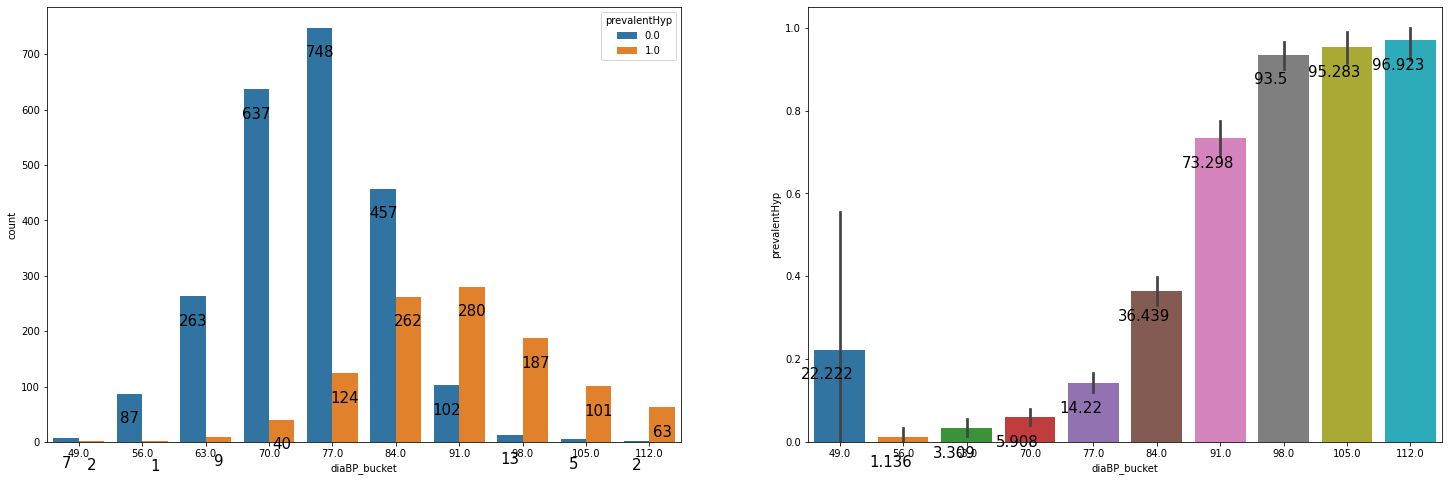

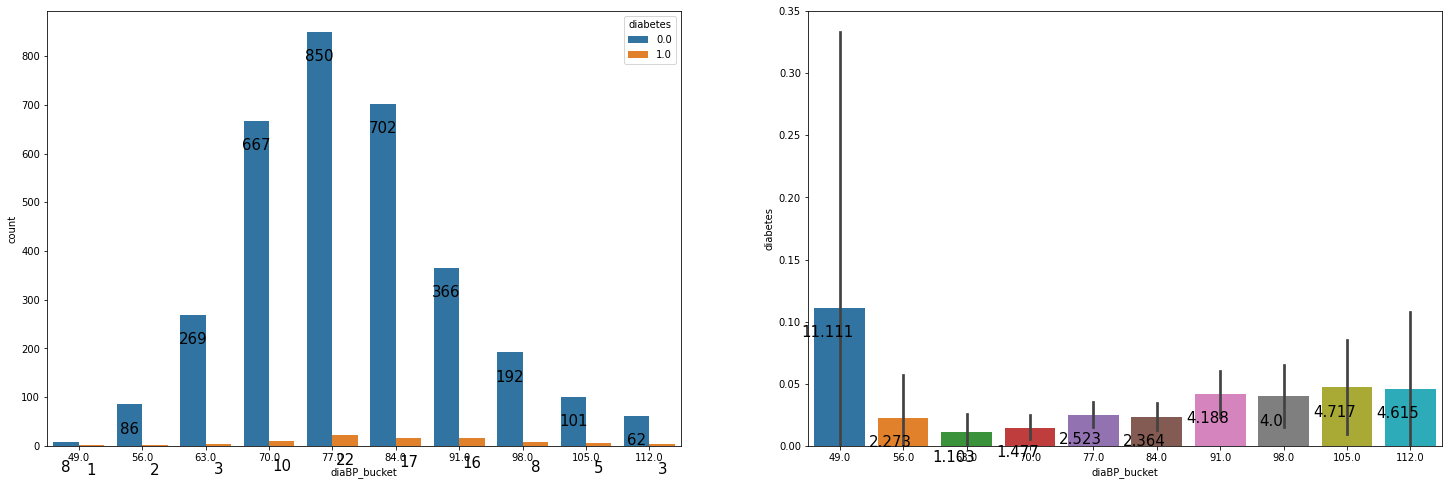

In [55]:
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='diaBP_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('diaBP_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to BMI**

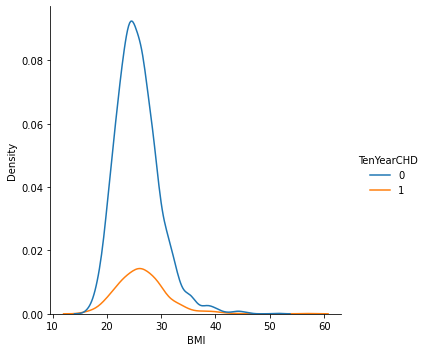

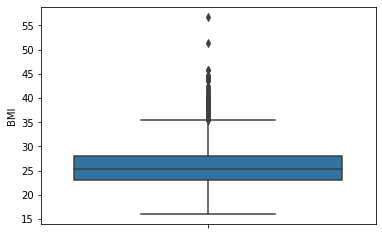

In [56]:
sns.displot(data=data_df, x='BMI', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='BMI')
plt.show()

In [57]:
vals = data_df.BMI.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['BMI'] = data_df['BMI'].apply(lambda x : min_lim if x < min_lim else x)
data_df['BMI'] = data_df['BMI'].apply(lambda x : max_lim if x > max_lim else x)

0.25    23.0300
0.75    27.9975
Name: BMI, dtype: float64


In [58]:

data_df['BMI_bucket'] = data_df['BMI'].apply(lambda x : round(1.98*(x//1.98),1))

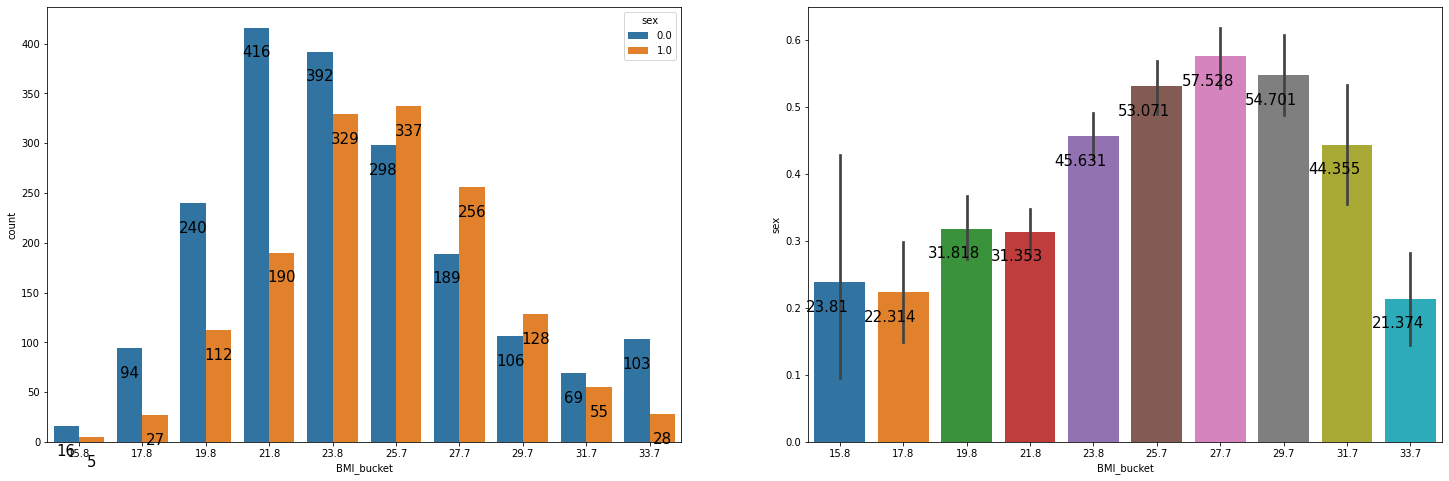

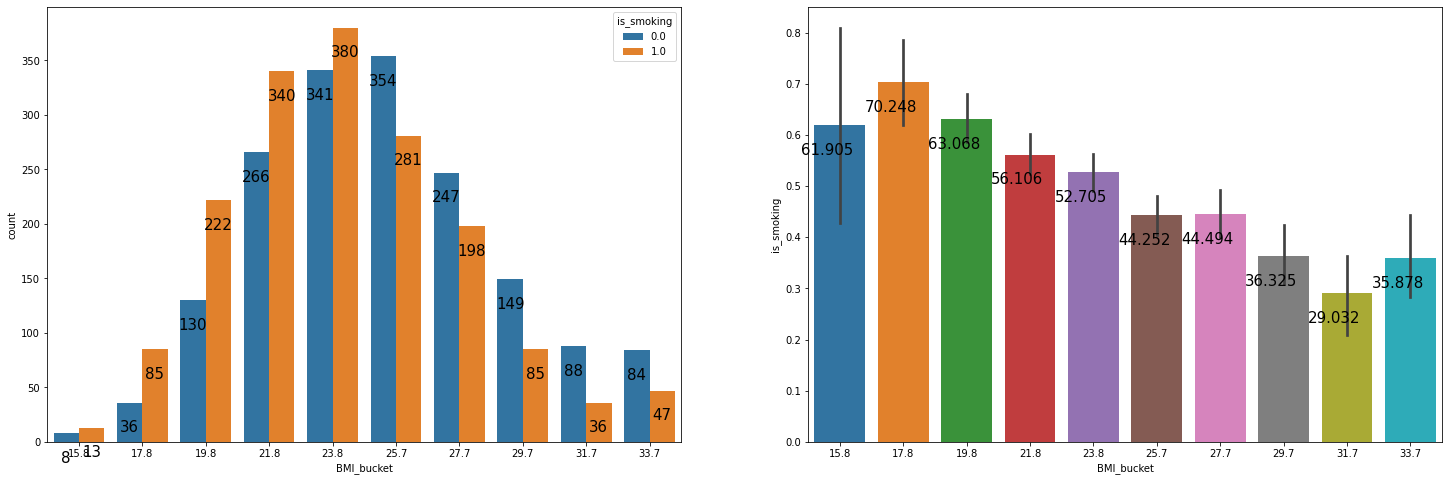

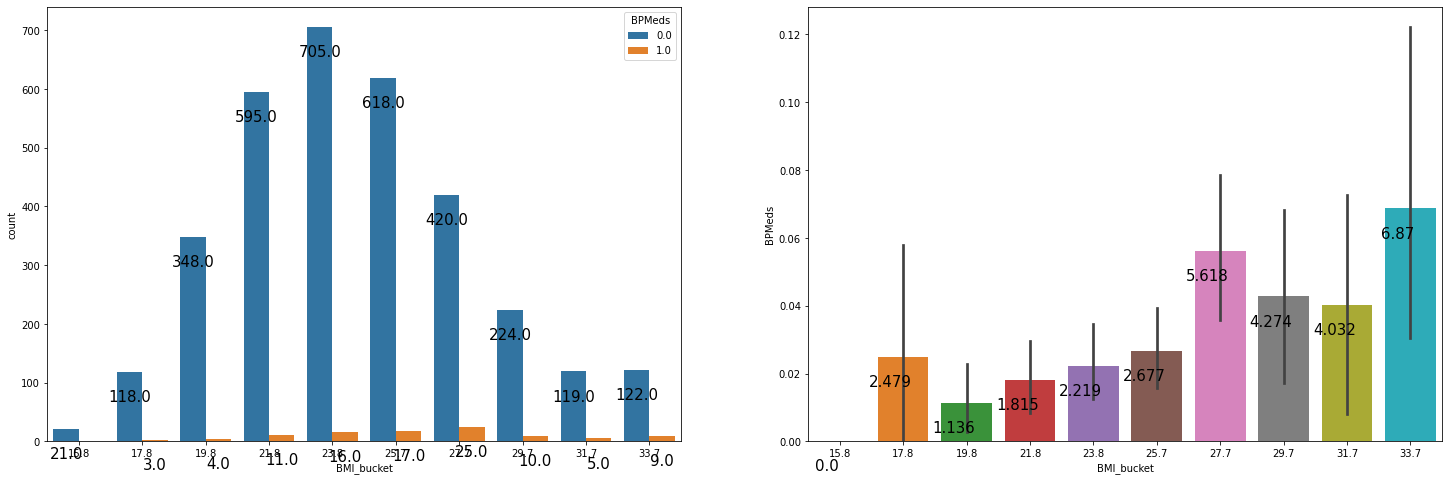

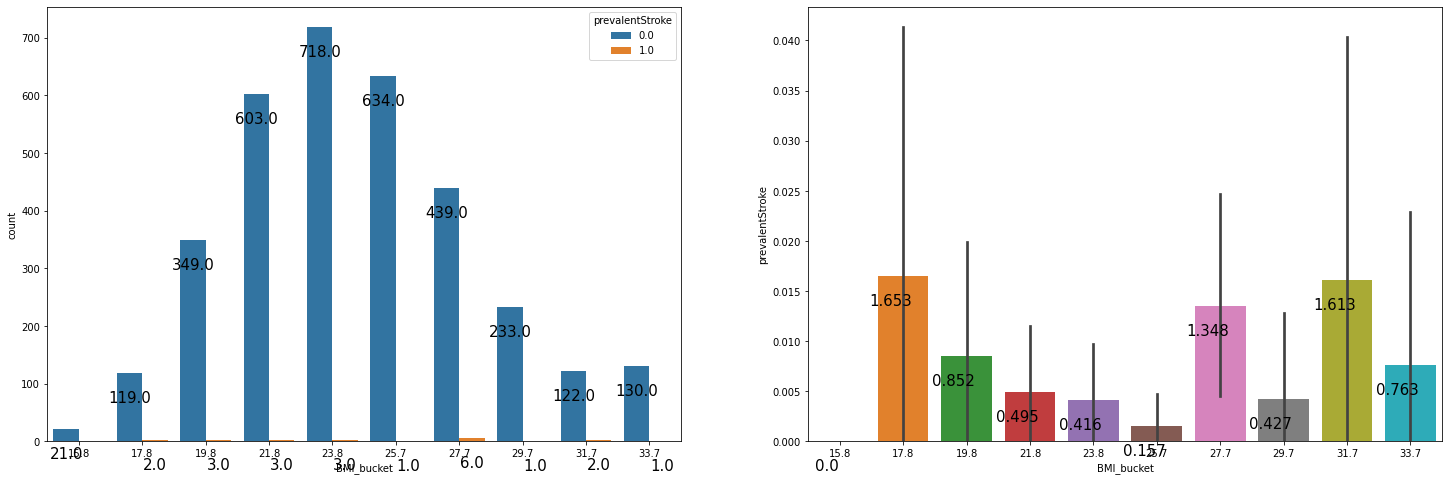

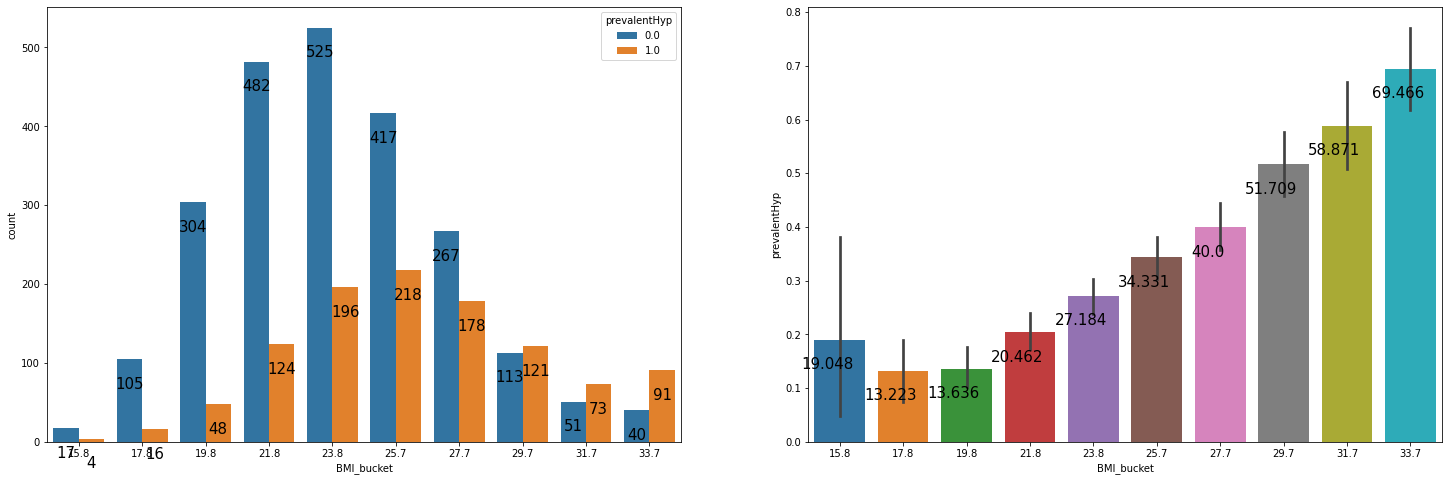

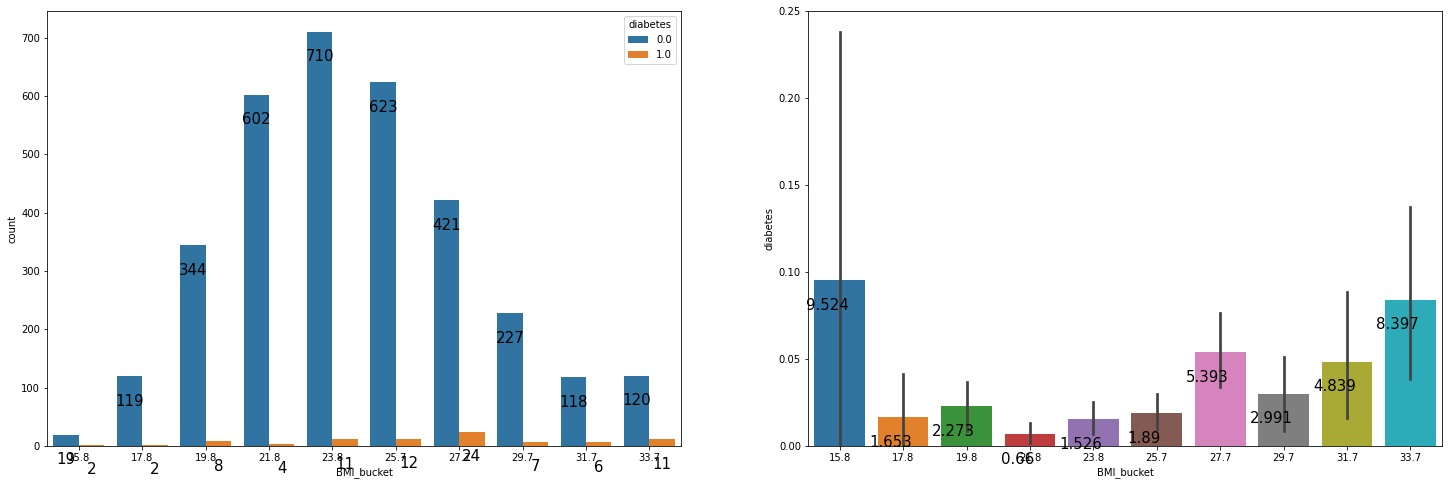

In [59]:
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='BMI_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('BMI_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to BMI**

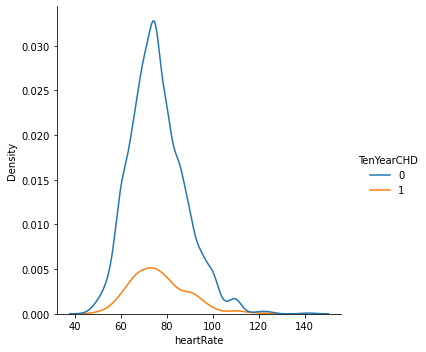

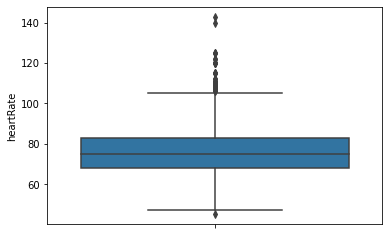

In [60]:
sns.displot(data=data_df, x='heartRate', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='heartRate')
plt.show()

In [61]:
vals = data_df.heartRate.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
data_df['heartRate'] = data_df['heartRate'].apply(lambda x : min_lim if x < min_lim else x)
data_df['heartRate'] = data_df['heartRate'].apply(lambda x : max_lim if x > max_lim else x)

0.25    68.0
0.75    83.0
Name: heartRate, dtype: float64


In [62]:
data_df['hr_bucket'] = data_df['heartRate'].apply(lambda x : 6.5*(x//6.5))

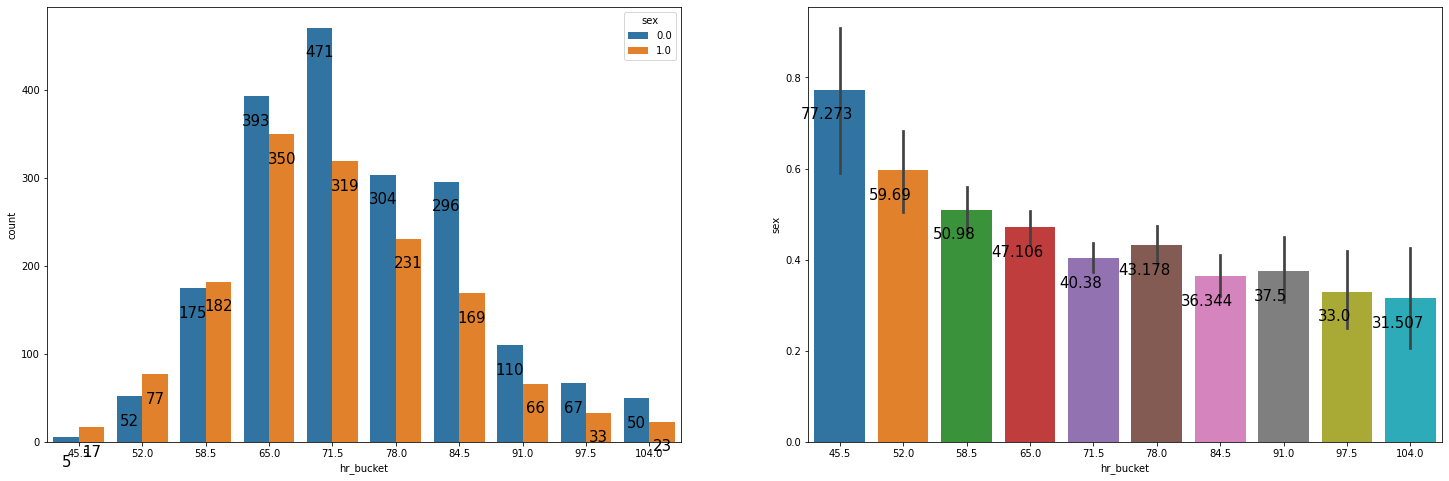

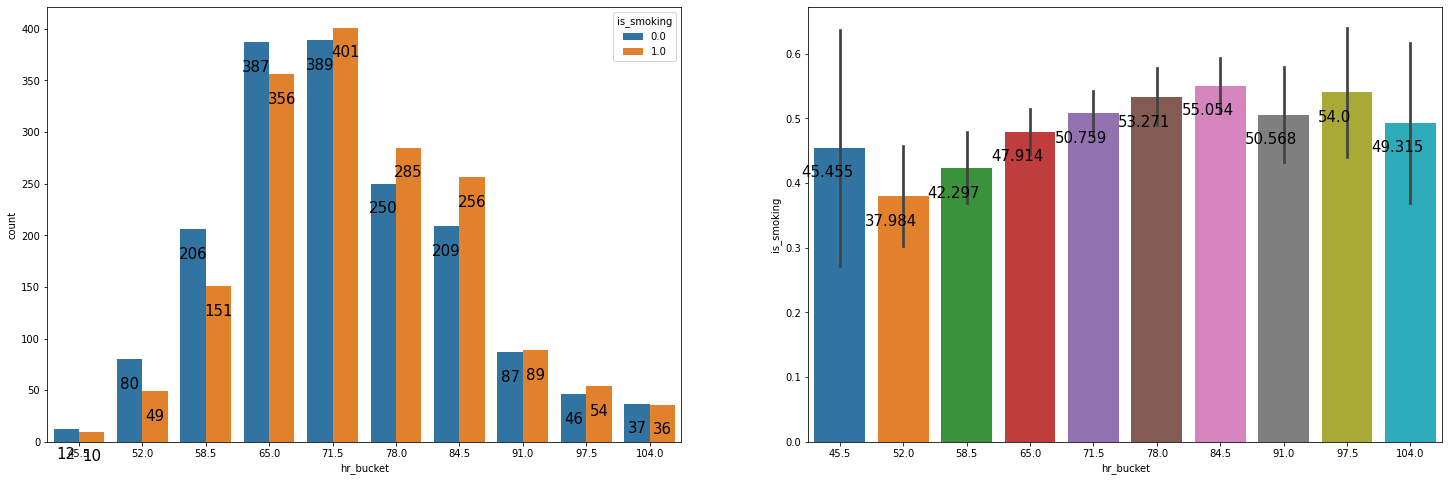

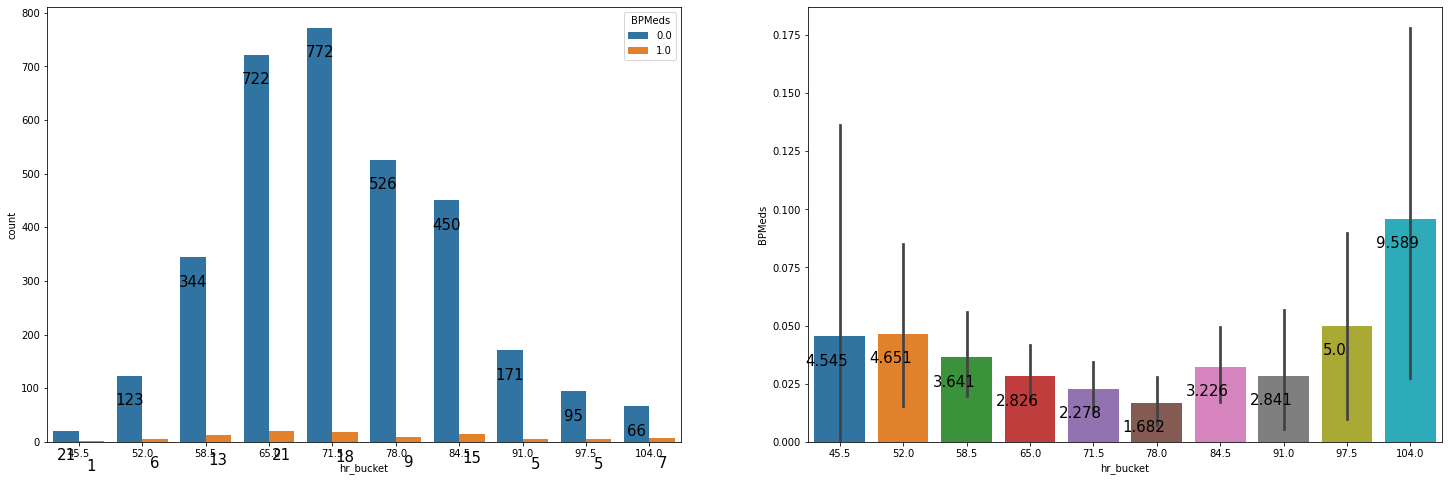

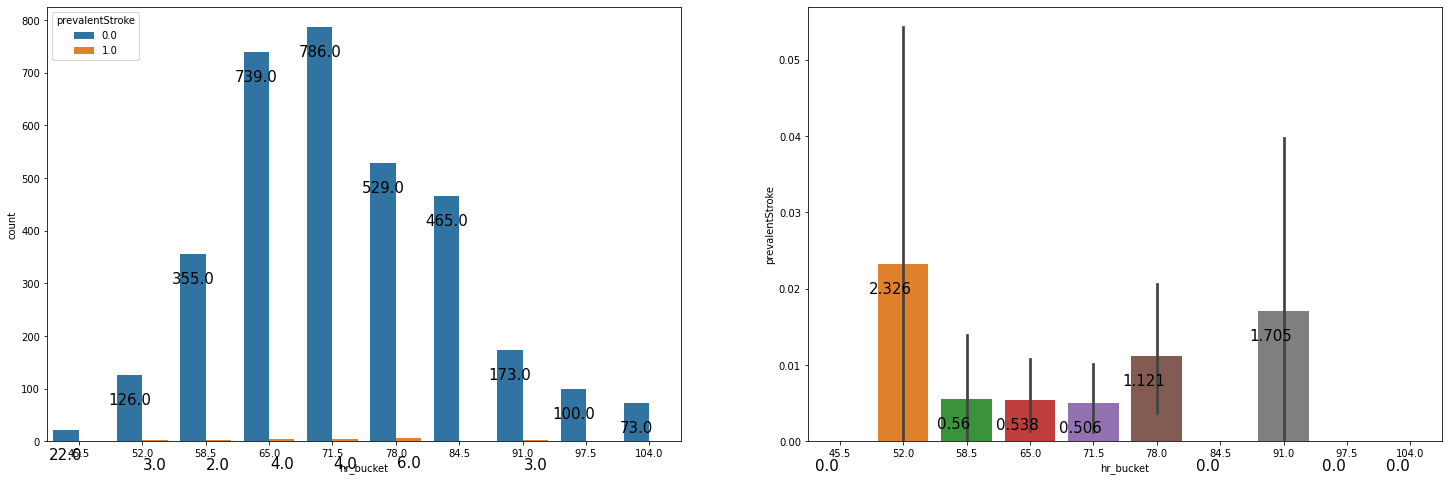

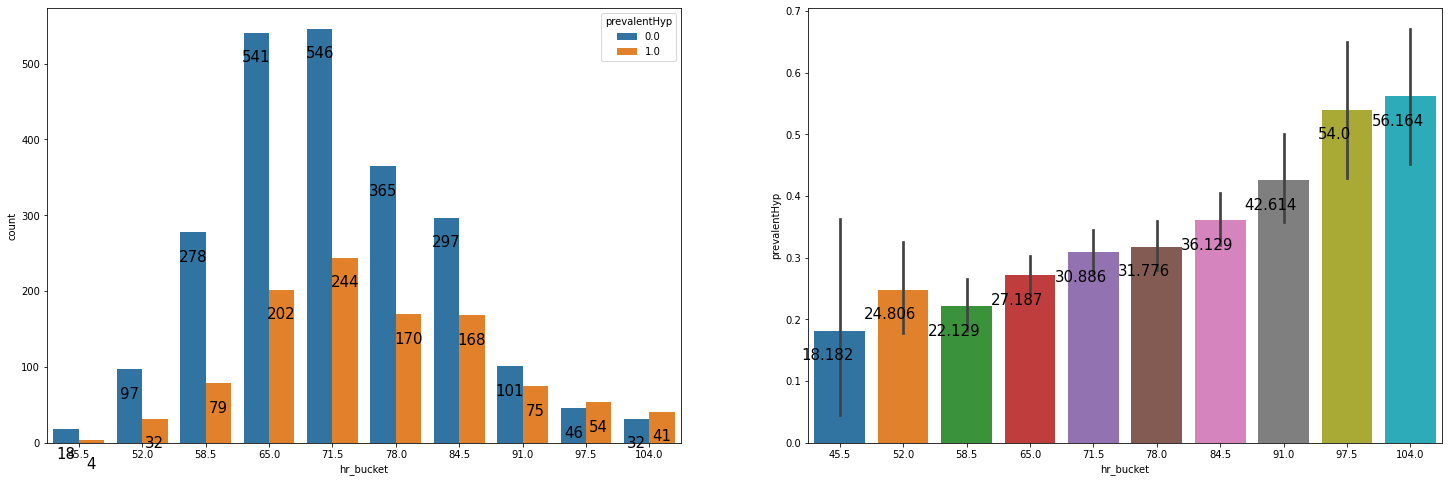

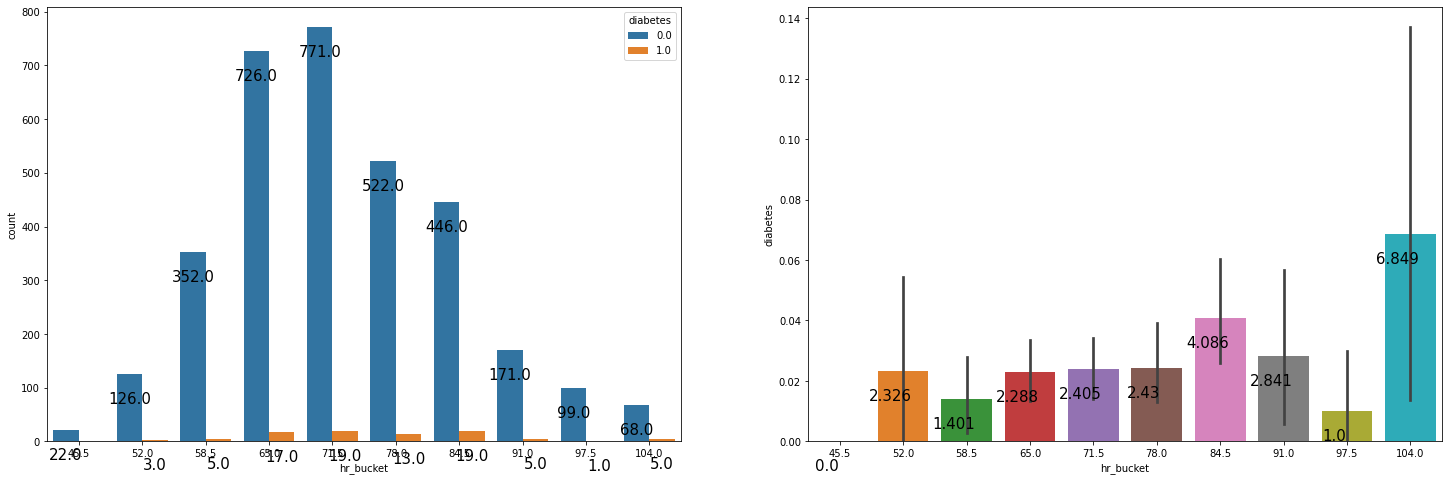

In [63]:
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='hr_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('hr_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

**Analysis with respect to glucose**

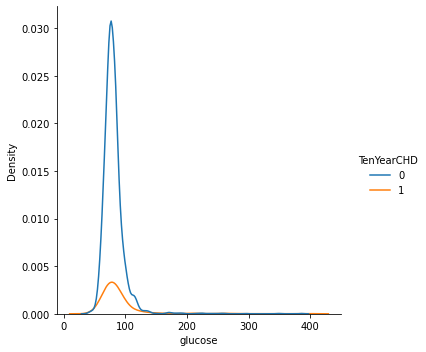

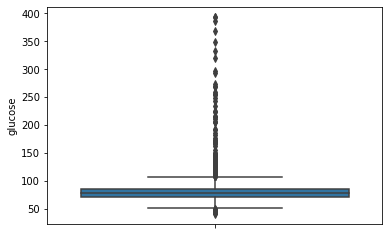

In [64]:
sns.displot(data=data_df, x='glucose', hue='TenYearCHD', kind="kde")
plt.show()
sns.boxplot(data=data_df,y='glucose')
plt.show()

In [65]:
vals = data_df.glucose.quantile([0.25,0.75])
print(vals)
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145
data_df['glucose'] = data_df['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data_df['glucose'] = data_df['glucose'].apply(lambda x : max_lim if x > max_lim else x)

0.25    72.0
0.75    86.0
Name: glucose, dtype: float64


In [66]:
data_df['glucose_bucket'] = data_df['glucose'].apply(lambda x : round(10*(x//10),1))

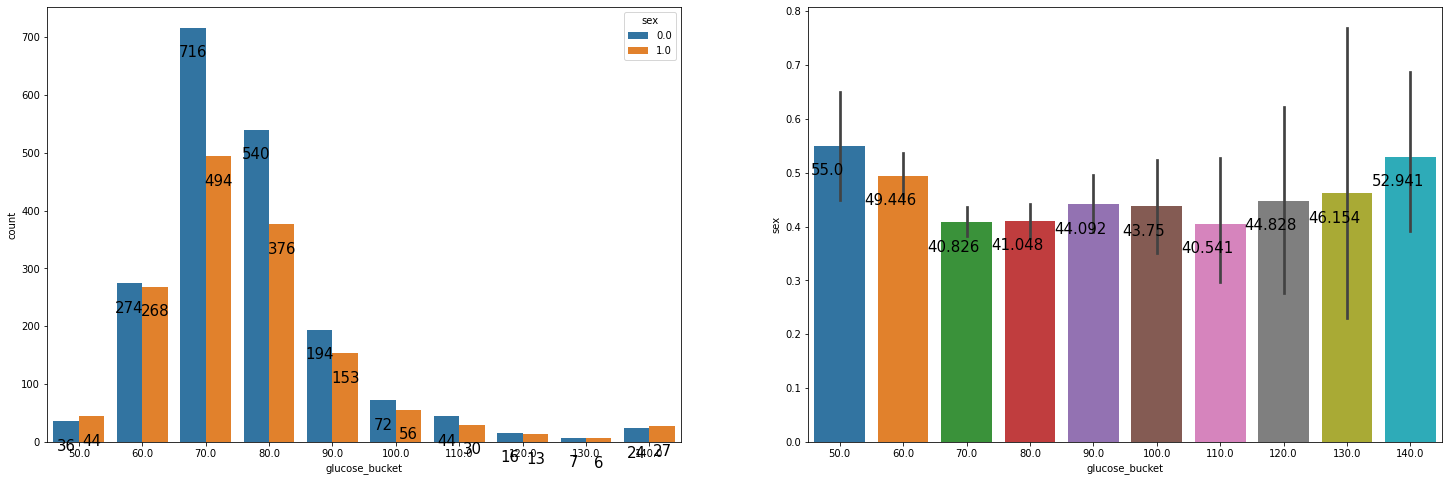

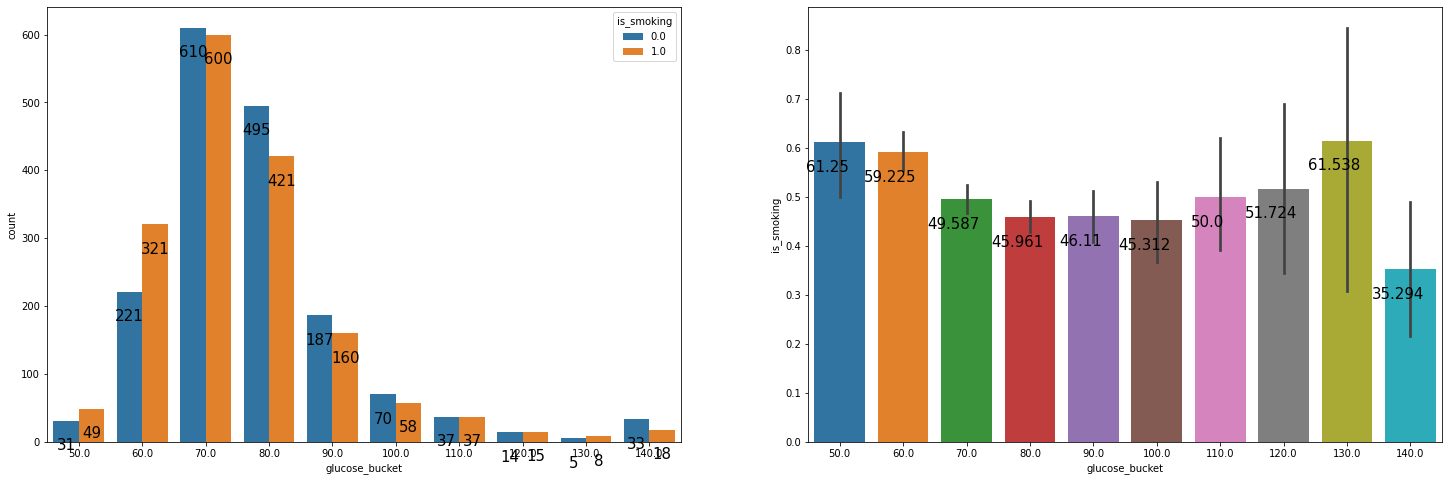

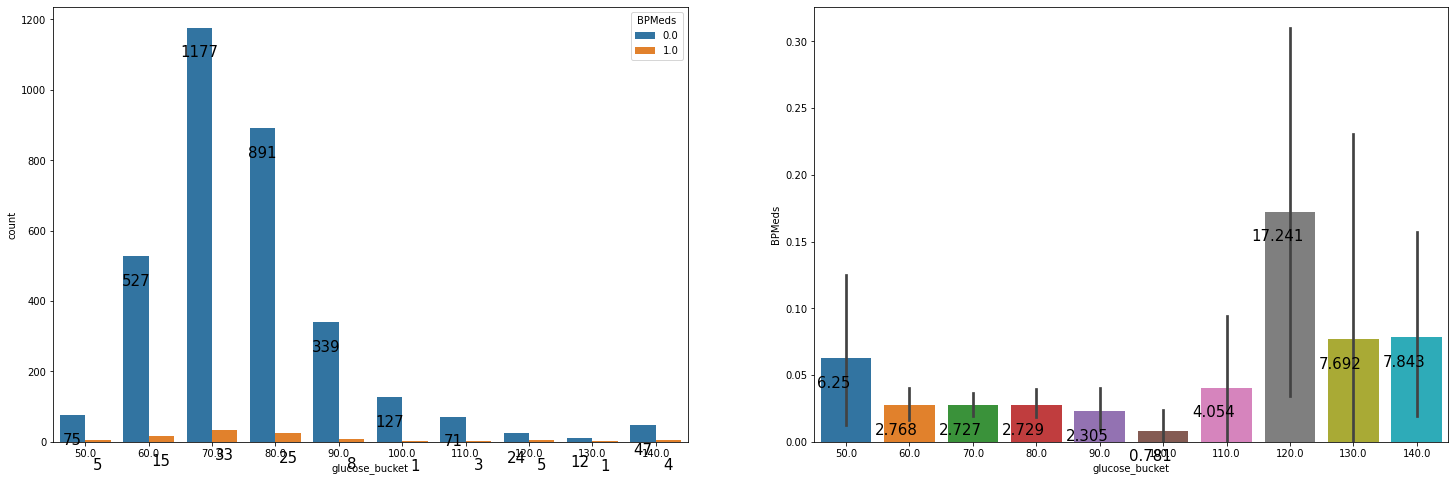

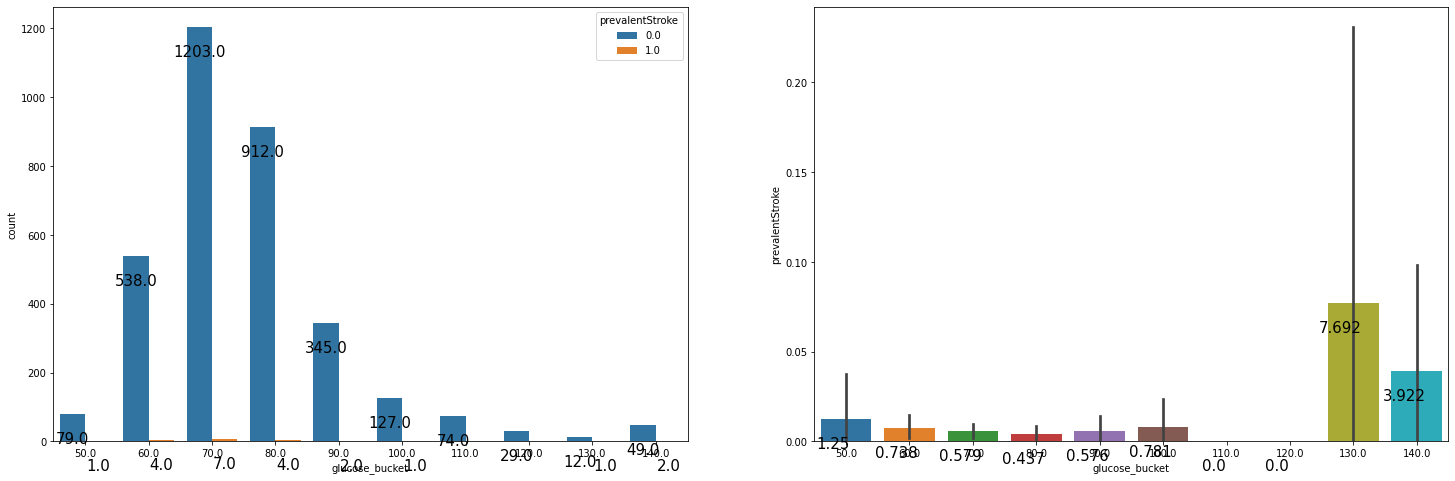

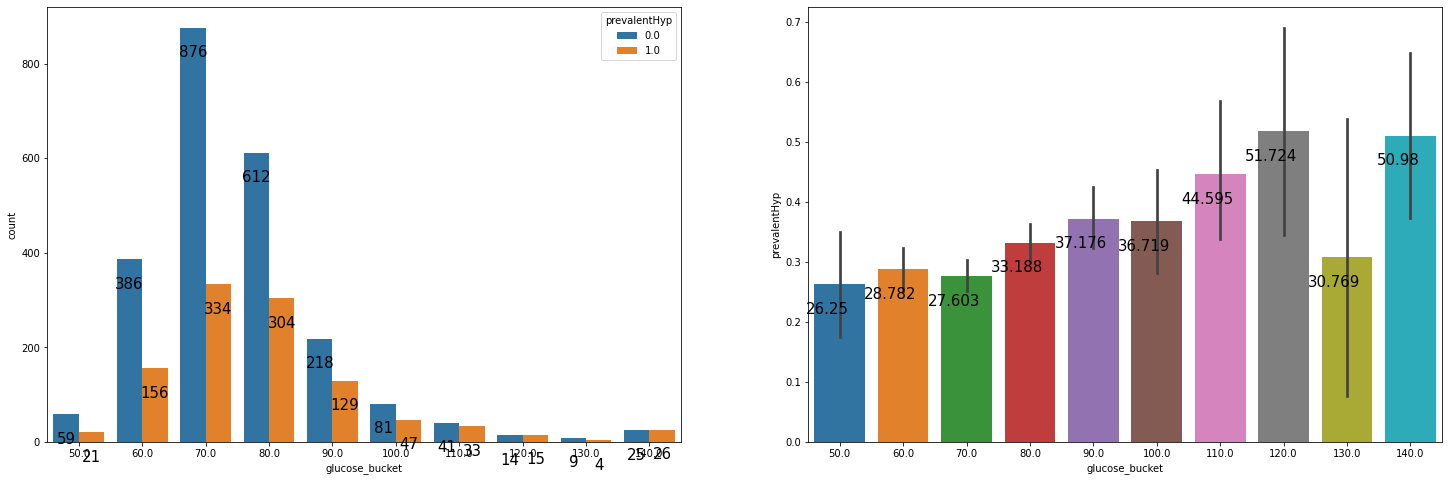

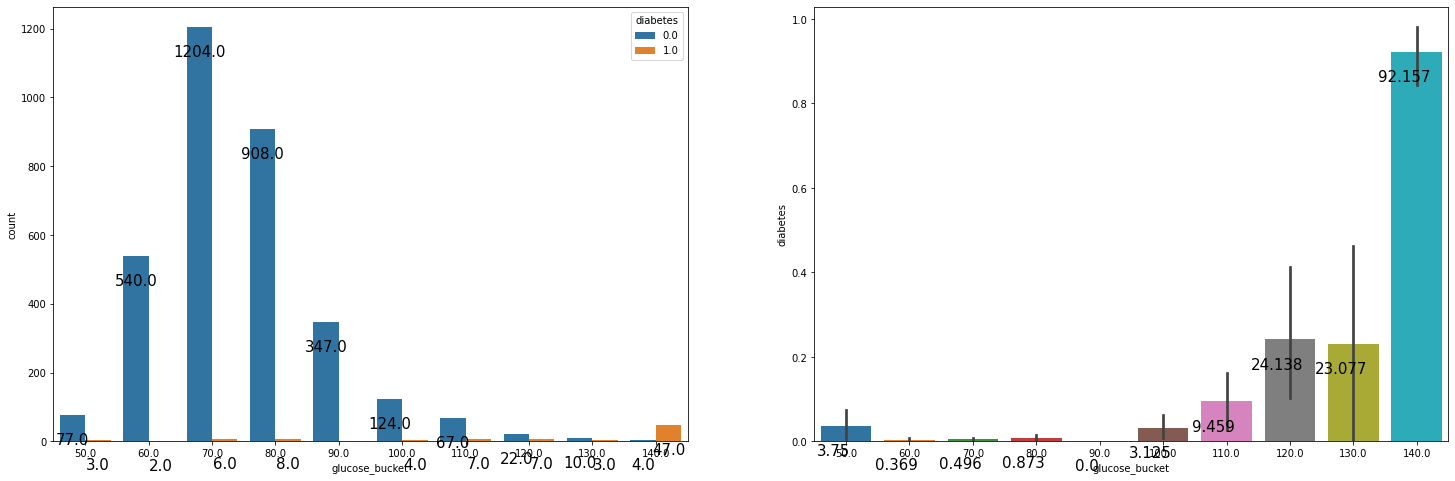

In [67]:
for v in ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']:
  fig, axes = plt.subplots(1,2,figsize=(25,8))
  ch=sns.countplot(x='glucose_bucket',hue=v,data=data_df, ax=axes[0])
  for p in ch.patches:
        ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)
  vh=sns.barplot('glucose_bucket',v, data = data_df, ax=axes[1])
  for p in vh.patches:
        vh.annotate(f'\n{round(p.get_height()*100,3)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=15)

In [68]:
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
num_features = ['age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [70]:
data_df=data_df.drop(columns=['cigsPerDay_bucket','glucose_bucket','hr_bucket','BMI_bucket','sysBP_bucket','diaBP_bucket','chol_bucket','age_bucket'])

In [71]:
data_df=data_df.apply(pd.to_numeric)

In [72]:
import scipy.stats as ss
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cat_dependency_matrix(cols):
  cat_matrix = np.zeros((cols.shape[0], cols.shape[0]))
  for i,col1 in enumerate(cols):
    for j,col2 in enumerate(cols):
      if i != j:
        cat_matrix[i,j] = cramers_v(data_df[col1], data_df[col2])
      else:
        cat_matrix[i,j] = 1.
  return pd.DataFrame(cat_matrix, columns=cat_cols, index=cat_cols)

In [73]:
cat_cols = np.array(['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD'])

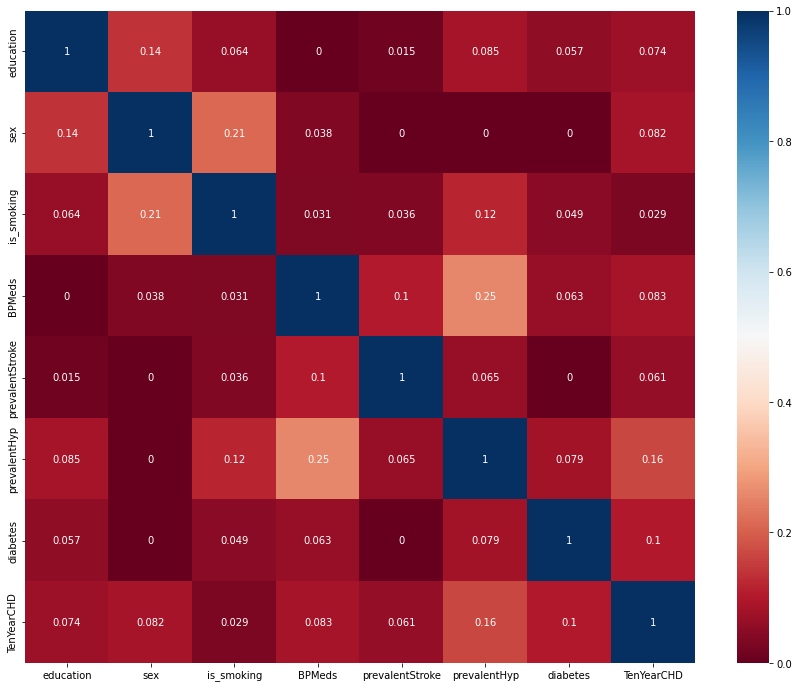

In [74]:
plt.figure(figsize = (15,12))
sns.heatmap(cat_dependency_matrix(cat_cols), cmap='RdBu', annot=True)

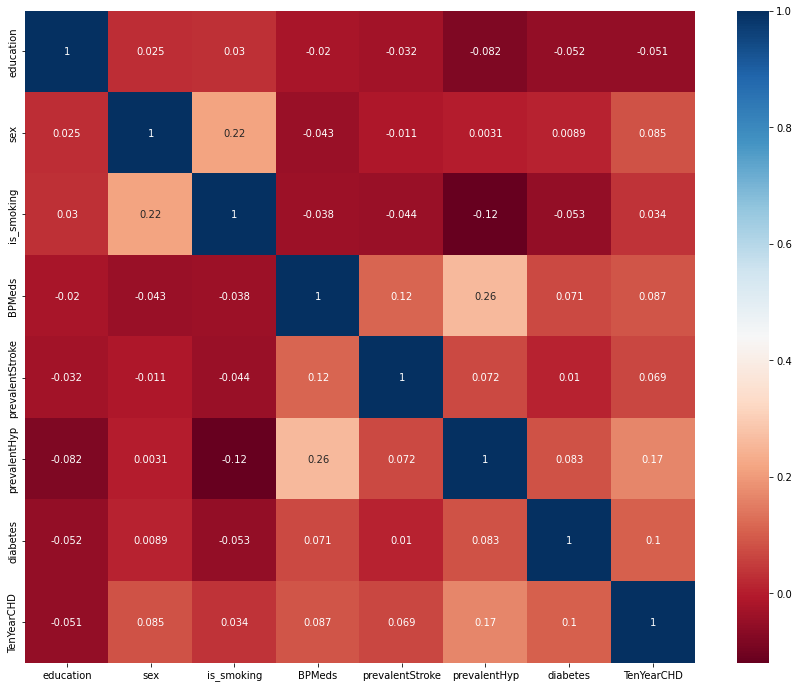

In [75]:
plt.figure(figsize = (15,12))
sns.heatmap(data_df[cat_cols].apply(pd.to_numeric).corr(), cmap='RdBu', annot=True)

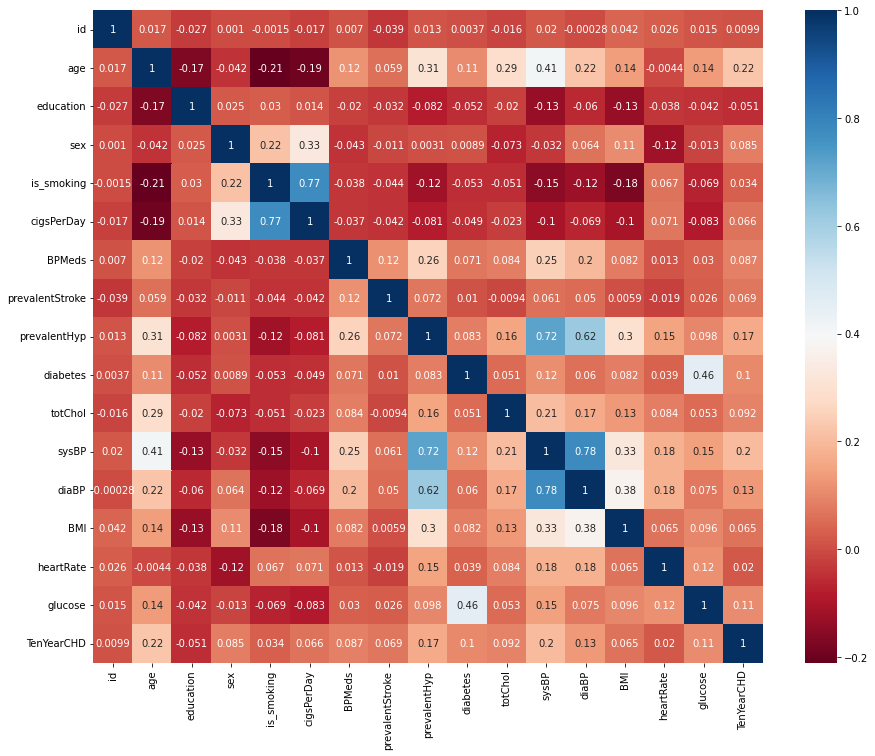

In [76]:
plt.figure(figsize = (15,12))
sns.heatmap(data_df.apply(pd.to_numeric).corr(), cmap='RdBu', annot=True)

In [77]:
data_df['PP']=abs(data_df['sysBP']-data_df['diaBP'])
data_df=data_df.drop(columns=['is_smoking','diaBP','sysBP','id'])

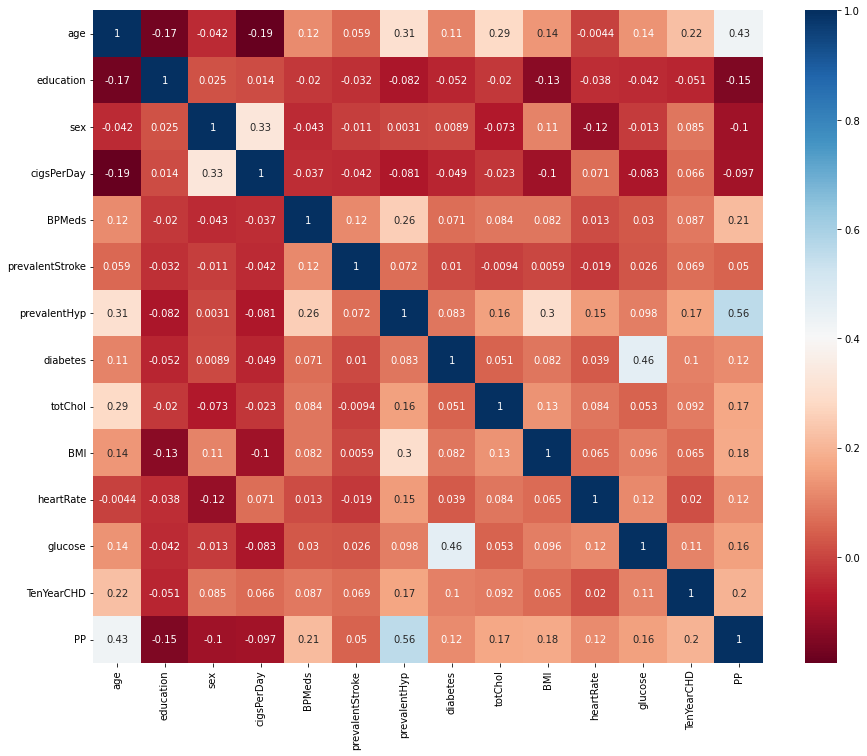

In [78]:
plt.figure(figsize = (15,12))
sns.heatmap(data_df.apply(pd.to_numeric).corr(), cmap='RdBu', annot=True)

In [79]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [80]:
ignore_features = ['TenYearCHD','prevalentHyp','prevalentStroke','diabetes','BPMeds','sex']
temp_df = data_df[[col for col in data_df.columns if col not in ignore_features]]
calc_vif(temp_df)

variables        VIF
0         age  41.435300
1   education   4.441906
2  cigsPerDay   1.635154
3     totChol  33.202350
4         BMI  39.400384
5   heartRate  36.901286
6     glucose  28.667398
7          PP  17.728653

In [81]:
data_df_copy=data_df.drop(columns=[])

In [89]:
X = data_df_copy.drop(columns=['TenYearCHD'], axis=1)
y = data_df_copy['TenYearCHD']

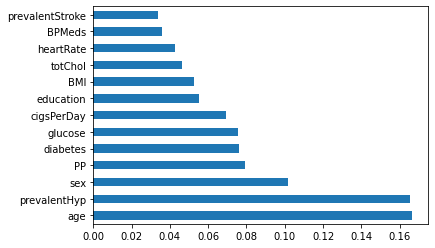

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
model=XGBClassifier()
model.fit(X,y)
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(13).plot(kind='barh')
plt.show()

In [96]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
# Using SMOTE to oversample
X,y =SMOTE().fit_resample(X,y)

In [97]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

age                0.414050
heartRate          0.355488
PP                 0.353524
totChol            0.294185
glucose            0.292921
education          0.241277
cigsPerDay         0.158494
sex                0.144083
prevalentHyp       0.114699
BMI                0.091405
BPMeds             0.027373
diabetes           0.023647
prevalentStroke    0.010048
dtype: float64

In [98]:
X=X.drop(columns=['prevalentHyp','prevalentStroke','diabetes','BPMeds','sex','BMI'])

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4318, 7)
(1440, 7)
(4318,)
(1440,)


In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Model

## **Libraries required for Model**

In [92]:
# Importing libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**Train and Test data sets**

In [104]:
# Creating a dataframe
model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Train F1','Test F1'])
  
# Creating necessary dictionaries
train_confusion_matrix = {}  
test_confusion_matrix = {}  
curve = {}

In [105]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict,model_df):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      print(f'{model.best_estimator_}')
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df=model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score
                                },
                               ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

1. Decision Tree Classifier

In [106]:
# Creating a dictionary for models
models = {'Decision Tree Classifier'        : DecisionTreeClassifier(random_state=42),
          'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),cv=5,
                                                           scoring    ='recall',
                                                           param_grid ={'max_depth'       : range(5,24),
                                                                        'min_samples_leaf': range(15),
                                                                        'max_features'    : ["auto", "sqrt", "log2",None,
                                                                                              0.25,   0.5,    0.75, 0.9,
                                                                                              1,      2,      3,    4,   5,   6,   7],
                                                                        'criterion'       : ["gini", "entropy"]})
                                                                       }

In [107]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=0.75,
                       random_state=42)


In [108]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        1.000000       0.809722   
1  Decision Tree Classifier tunned        0.987957       0.806944   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.793758      1.000000     0.827440       1.000000   
1         0.990741        0.792633      0.985267     0.821782       0.987974   

   Test ROC AUC  Train F1   Test F1  
0      0.810036  1.000000  0.810249  
1      0.807208  0.987996  0.806944

2. Logistic Regression classification

In [ ]:
# Creating a dictionary for models
models = {'Logistic Regression'        : LogisticRegression(random_state=42),
          'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),cv=5,
                                                      param_grid ={'penalty' : ['l1', 'l2', 'elasticnet',None],
                                                                   'C'       : np.logspace(-5, 4, 30),
                                                                   'solver'  : ['lbfgs','newton-cg','liblinear']}
                                                      )}

In [ ]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

LogisticRegression(C=4.1753189365604006e-05, random_state=42)


In [ ]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        0.998697       0.853299   
1  Decision Tree Classifier tunned        0.990664       0.854167   
2              Logistic Regression        0.656969       0.657118   
3       Logistic Regression tunned        0.658923       0.653646   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.846831      0.997409     0.854352       0.998705   
1         0.994776        0.852050      0.986615     0.849023       0.990687   
2         0.655013        0.642857      0.671416     0.671403       0.656887   
3         0.658713        0.642361      0.667530     0.657194       0.658874   

   Test ROC AUC  Train F1   Test F1  
0      0.853322  0.998703  0.850575  
1      0.854053  0.990679  0.850534  
2      0.657433  0.663113  0.656820  
3      0.653724  0.663092  0.649693

3. KN Classifier

In [ ]:
# Creating a dictionary for models
models = {'KNN' : KNeighborsClassifier(),
          'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : range(10),
                                                   'weights' : ['uniform','distance'],
                                                   'metric' : ['minkowski','euclidean','manhattan']},
                                      cv=5)}

In [ ]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')


In [ ]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        0.998697       0.853299   
1  Decision Tree Classifier tunned        0.990664       0.854167   
2              Logistic Regression        0.656969       0.657118   
3       Logistic Regression tunned        0.658923       0.653646   
4                              KNN        0.854972       0.778646   
5                       KNN tunned        0.998697       0.860243   
6                              KNN        0.854972       0.778646   
7                       KNN tunned        0.998697       0.863715   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.846831      0.997409     0.854352       0.998705   
1         0.994776        0.852050      0.986615     0.849023       0.990687   
2         0.655013        0.642857      0.671416     0.671403       0.656887   
3         0.658713        0.642361      0.667530     0.657194       0.658874   
4         0.799636        0.724490      0.949482     0.882771       0.854435   
5         1.000000        0.830592      0.997409     0.896980       0.998705   
6         0.799636        0.724490      0.949482     0.882771       0.854435   
7         1.000000        0.844068      0.997409     0.884547       0.998705   

   Test ROC AUC  Train F1   Test F1  
0      0.853322  0.998703  0.850575  
1      0.854053  0.990679  0.850534  
2      0.657433  0.663113  0.656820  
3      0.653724  0.663092  0.649693  
4      0.780944  0.868141  0.795837  
5      0.861054  0.998703  0.862511  
6      0.780944  0.868141  0.795837  
7      0.864175  0.998703  0.863833

4. Support vector classifier

In [ ]:
# Creating a dictionary for models
models = {'SVC'        : SVC(probability=True,random_state=42),
          'SVC tunned' : GridSearchCV(SVC(probability=True,random_state=42),cv = 5,
                                            param_grid={'kernel' : ['rbf'],
                                                        'C'      : [0.1, 1, 10, 100, 1000]}
                                            )}

In [ ]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

SVC(C=1000, probability=True, random_state=42)


In [ ]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        0.998697       0.853299   
1  Decision Tree Classifier tunned        0.990664       0.854167   
2              Logistic Regression        0.656969       0.657118   
3       Logistic Regression tunned        0.658923       0.653646   
4                              KNN        0.854972       0.778646   
5                       KNN tunned        0.998697       0.860243   
6                              KNN        0.854972       0.778646   
7                       KNN tunned        0.998697       0.863715   
8                              SVC        0.672167       0.655382   
9                       SVC tunned        0.723838       0.676215   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.846831      0.997409     0.854352       0.998705   
1         0.994776        0.852050      0.986615     0.849023       0.990687   
2         0.655013        0.642857      0.671416     0.671403       0.656887   
3         0.658713        0.642361      0.667530     0.657194       0.658874   
4         0.799636        0.724490      0.949482     0.882771       0.854435   
5         1.000000        0.830592      0.997409     0.896980       0.998705   
6         0.799636        0.724490      0.949482     0.882771       0.854435   
7         1.000000        0.844068      0.997409     0.884547       0.998705   
8         0.663158        0.635621      0.707254     0.690941       0.671968   
9         0.702955        0.648438      0.780656     0.737123       0.723516   

   Test ROC AUC  Train F1   Test F1  
0      0.853322  0.998703  0.850575  
1      0.854053  0.990679  0.850534  
2      0.657433  0.663113  0.656820  
3      0.653724  0.663092  0.649693  
4      0.780944  0.868141  0.795837  
5      0.861054  0.998703  0.862511  
6      0.780944  0.868141  0.795837  
7      0.864175  0.998703  0.863833  
8      0.656167  0.684496  0.662128  
9      0.677560  0.739771  0.689942

In [ ]:
# Creating a dictionary for models
models = {'XGB Classifier'        : XGBClassifier(random_state=42),
          'XGB Classifier tunned' : GridSearchCV(XGBClassifier(random_state=42),cv=5, 
                                                       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                                                    'gamma'   : np.arange(0.0,40.0,0.005)},  
                                                       )}

In [ ]:
# Using the model function to understand the scores of different models
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

KeyboardInterrupt: ignored

In [ ]:
# Creating a dictionary for models
models = {'Random Forest' : RandomForestClassifier(random_state=42),
          'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': ['entropy', 'gini'],
                                                                'max_depth': [11,21],
                                                                'n_estimators': [100],
                                                                'max_features': [1] },
                                                          cv = 3, 
                                                          verbose= 0
                                                          )}}

In [ ]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models)

In [ ]:
# Models and their scores
model_table

Model : Decision Tree Classifier


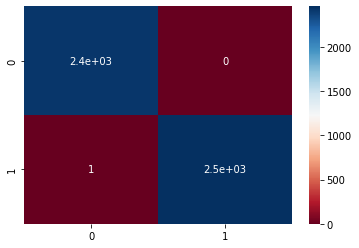

Model : Decision Tree Classifier tunned


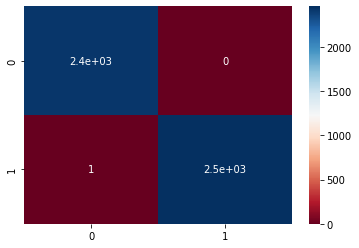

Model : Logistic Regression


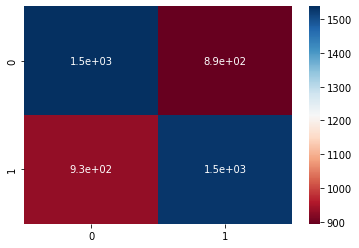

Model : Logistic Regression tunned


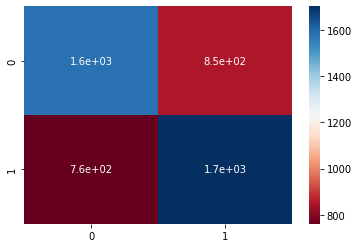

Model : KNN


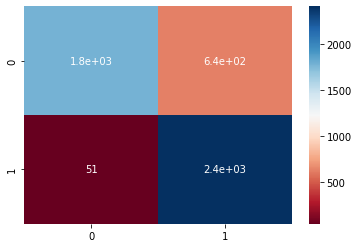

Model : KNN tunned


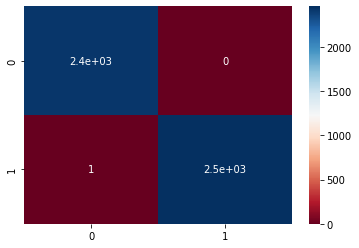

Model : SVC


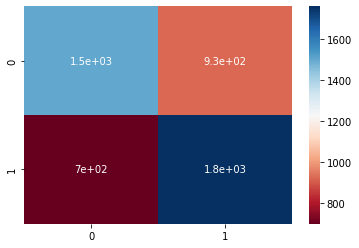

Model : SVC tunned


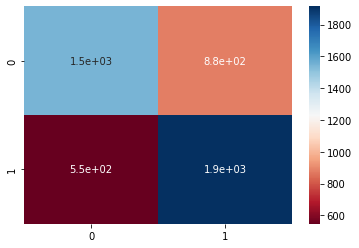

Model : XGB Classifier


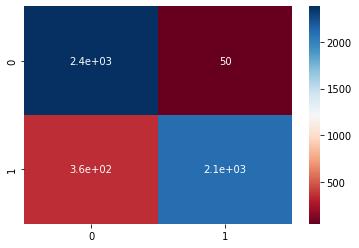

Model : XGB Classifier tunned


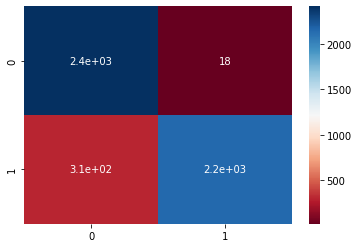

Model : Random Forest


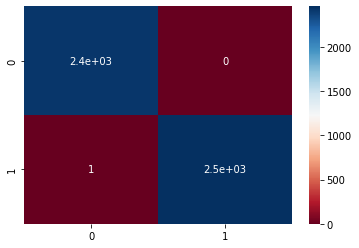

Model : Random Classifier tunned


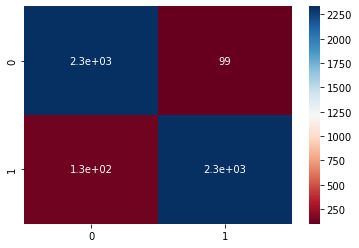

In [ ]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  sns.heatmap(matrix, cmap='RdBu', annot=True)
  plt.show()

Model : Decision Tree Classifier


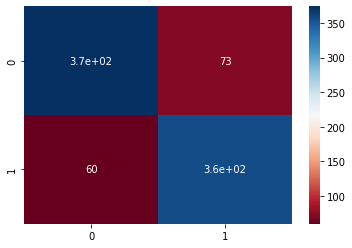

Model : Decision Tree Classifier tunned


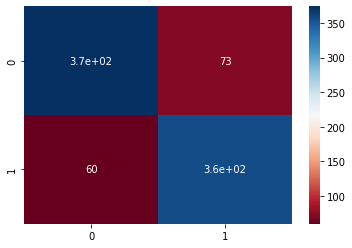

Model : Logistic Regression


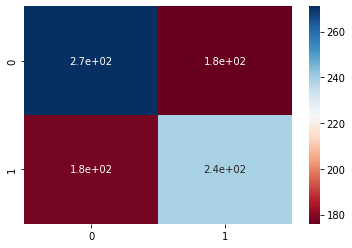

Model : Logistic Regression tunned


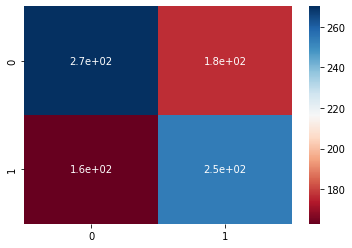

Model : KNN


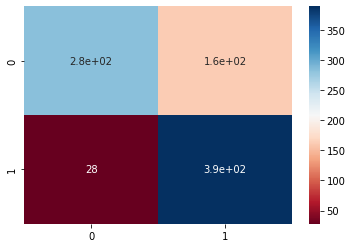

Model : KNN tunned


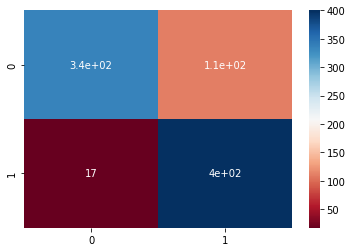

Model : SVC


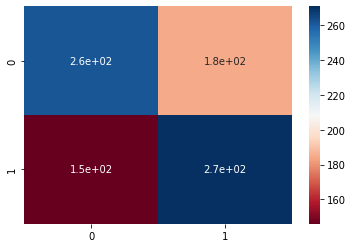

Model : SVC tunned


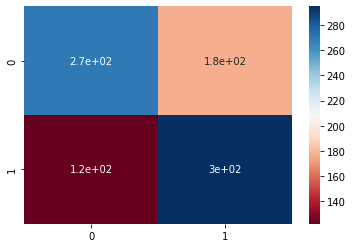

Model : XGB Classifier


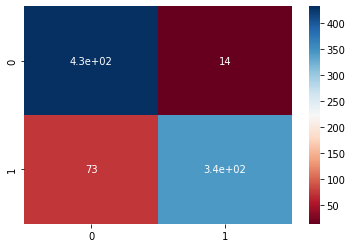

Model : XGB Classifier tunned


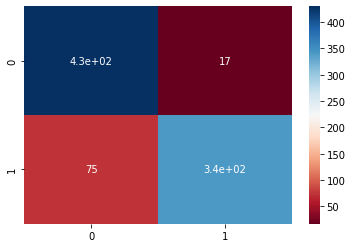

Model : Random Forest


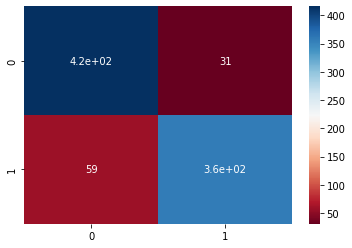

Model : Random Classifier tunned


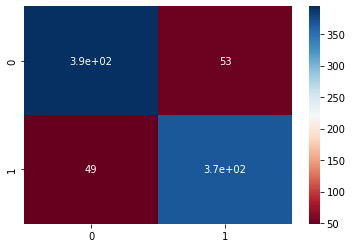

In [ ]:
# Test confusion matrix
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  sns.heatmap(matrix, cmap='RdBu', annot=True)
  plt.show()
 


Text(0.5, 1.0, 'ROC CURVE')

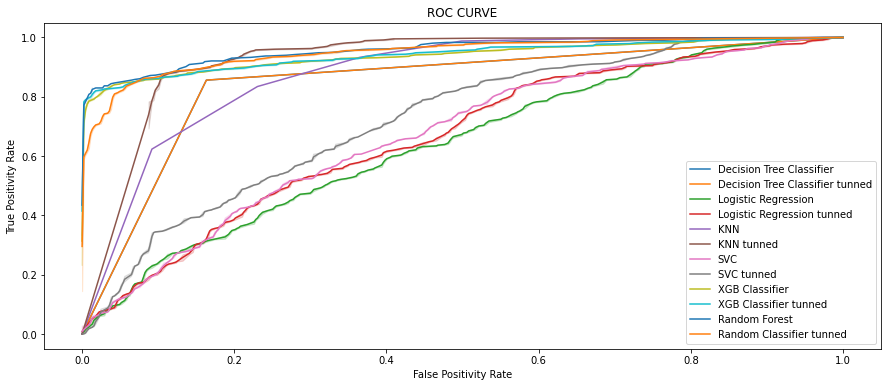

In [ ]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

# **Hyperparameter Tuning**

In [ ]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  range(5,24),
                                                                      'min_samples_leaf': range(15),
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5),
          
          'Logistic Regression tunned' : GridSearchCV(LogisticRegression(random_state=42),
                                                      scoring='accuracy',
                                                      param_grid={'penalty' : ['l1', 'l2', 'elasticnet'],
                                                                  'C' : np.logspace(-4, 4, 20),
                                                                  'solver' : ['lbfgs','newton-cg','liblinear']},
                                                      cv=5),
          
          'KNN tunned' : GridSearchCV(KNeighborsClassifier(),
                                      param_grid={ 'n_neighbors' : range(4,10),
                                                   'weights' : ['uniform','distance'],
                                                   'metric' : ['minkowski','euclidean','manhattan']},
                                      cv=5),
          
          'SVC tunned' : RandomizedSearchCV(SVC(probability=True,random_state=42),
                                            param_distributions={'kernel' : ['rbf'],
                                             "C":[0.1, 1, 10, 100, 1000]}, 
                                            n_iter = 50,
                                            cv = 5, 
                                            verbose= 5, 
                                            random_state=42),
          
          'XGB Classifier tunned' : RandomizedSearchCV(XGBClassifier(random_state=42), 
                                                       param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                                                            'gamma': np.arange(0.0,40.0,0.005)},  
                                                       n_iter = 100,
                                                       verbose= 2, 
                                                       scoring="accuracy", 
                                                       cv=5),
          
          'Random Classifier tunned' : GridSearchCV(RandomForestClassifier(random_state=42),
                                                    param_grid={'criterion': ['entropy', 'gini'],
                                                                'max_depth': [6,9,11,15,17,19,21,24],
                                                                'n_estimators': [50,100],
                                                                'max_features': ["auto", "sqrt", "log2",None,1,3,5,7] },
                                                          scoring='recall',
                                                          cv = 3, 
                                                          verbose= 2
                                                          )}

In [ ]:
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, models,'tunning')

In [ ]:
model_table






   ## **Conclusion :**

Models accuracy of predicting the patient's risk of developing Coronary Heart Disease **(CHD)** in the next **10 years.**

As conclusion to the project, I would like to summarize the process and some details of the project.

The data was cleaned, an EDA was performed, transformation of data was done in order to ensure it fits well into machine learning models, modelling along with evaluation of the models was done and finally hyperparameter tuning was done in an attempt to imporve the model.

6 models were used in the project, namely, Decision Tree, Logistic Regression, Random Forest, XGB Classifier, KNN and SVM. Random Forest was best performing base model. Hyperparameter tuning was done on the same model.

The final results of the model are almost close to the base model and we have acheived almost 90% test accuracy and test precision, where as we have acheived almost 88% test recall.

Using SHAP we identified the feature importances and identified that, gender, age and education were 3 main influencers.

Other methods or models could be used to further improve the model. With the help of a medical expert we could engineer more features which would in turn help improve the model further.

In [ ]:
# Creating a dictionary for models
models = {'Decision Tree Classifier' : DecisionTreeClassifier(random_state=42),
          'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [21],
                                                                      'min_samples_leaf': range(1,15),
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5)}

In [ ]:
model_df, train_confusion_matrix, test_confusion_matrix, curve= model_build(X_train, y_train, X_test, y_test, models,model_df)

DecisionTreeClassifier(max_depth=21, max_features=0.9, random_state=42)


In [ ]:
model_df

Model  Train Accuracy  Test Accuracy  \
0         Decision Tree Classifier        0.999183       0.827546   
1  Decision Tree Classifier tunned        0.706988       0.663194   
2         Decision Tree Classifier        0.999183       0.827546   
3  Decision Tree Classifier tunned        0.962812       0.847222   
4         Decision Tree Classifier        0.999183       0.827546   
5  Decision Tree Classifier tunned        0.993666       0.828704   

   Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0         1.000000        0.797778      0.998375     0.860911       0.999188   
1         0.649680        0.600962      0.906174     0.899281       0.705760   
2         1.000000        0.797778      0.998375     0.860911       0.999188   
3         0.984694        0.855362      0.940699     0.822542       0.962948   
4         1.000000        0.797778      0.998375     0.860911       0.999188   
5         0.997544        0.809195      0.989846     0.844125       0.993689   

   Test ROC AUC  Test F1  Train F1  max_depth  min_samples_leaf  max_features  \
0      0.828666      NaN       NaN        NaN               NaN           NaN   
1      0.671117      NaN       NaN        NaN               NaN           NaN   
2      0.828666      NaN       NaN        NaN               NaN           NaN   
3      0.846394      NaN       NaN        NaN               NaN           NaN   
4      0.828666      NaN       NaN        NaN               NaN           NaN   
5      0.829221      NaN       NaN        NaN               NaN           NaN   

   criterion  Test F1   Train F1   
0        NaN  0.828143   0.999187  
1        NaN  0.720461   0.756784  
2        NaN  0.828143   0.999187  
3        NaN  0.838631   0.962194  
4        NaN  0.828143   0.999187  
5        NaN  0.826291   0.993680

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=42),refit=False,
                                                           scoring=['recall','accuracy'],
                                                           param_grid={'max_depth':  [19,21,23],
                                                                      'min_samples_leaf': [1],
                                                                      'max_features': ["auto", "sqrt", "log2",None,
                                                                                       0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                                                       1, 2, 3, 4, 5, 6, 7],
                                                                      'criterion': ["gini", "entropy"]},cv=5, return_train_score=False)
clf.fit(X_train, y_train)


{'mean_fit_time': array([0.01690173, 0.0090415 , 0.01141477, 0.0189281 , 0.00751462,
        0.00696044, 0.01055002, 0.01211181, 0.0129015 , 0.01356888,
        0.01743183, 0.01926417, 0.02022462, 0.00712781, 0.00902729,
        0.0137898 , 0.01309891, 0.01476092, 0.01636291, 0.01980791,
        0.0087019 , 0.01073656, 0.01135664, 0.02133193, 0.00743184,
        0.00750442, 0.00948319, 0.01227837, 0.01340909, 0.01320162,
        0.01614766, 0.01646419, 0.01879191, 0.00708208, 0.00885224,
        0.01192837, 0.01320786, 0.01836476, 0.01702371, 0.01937957,
        0.00917158, 0.00937362, 0.01113811, 0.02244563, 0.00722232,
        0.00731802, 0.00922565, 0.01225357, 0.01293979, 0.01278973,
        0.01490116, 0.01663051, 0.01832976, 0.00840063, 0.00913639,
        0.01113548, 0.01402116, 0.01686082, 0.01654515, 0.01795101,
        0.01240625, 0.01246176, 0.01692071, 0.03034987, 0.00881524,
        0.00888705, 0.0124846 , 0.01745443, 0.01511159, 0.01275988,
        0.01452932, 0.01628361,

In [ ]:
df[['param_criterion','param_max_depth','param_min_samples_leaf','param_max_features','mean_test_accuracy','mean_test_recall']]

param_criterion param_max_depth param_min_samples_leaf param_max_features  \
0              gini              19                      1               auto   
1              gini              19                      1               sqrt   
2              gini              19                      1               log2   
3              gini              19                      1               None   
4              gini              19                      1                0.1   
..              ...             ...                    ...                ...   
115         entropy              23                      1                  3   
116         entropy              23                      1                  4   
117         entropy              23                      1                  5   
118         entropy              23                      1                  6   
119         entropy              23                      1                  7   

     mean_test_accuracy  mean_test_recall  
0              0.836125          0.834681  
1              0.836125          0.834681  
2              0.824682          0.828590  
3              0.843071          0.850937  
4              0.817733          0.807470  
..                  ...               ...  
115            0.814872          0.818432  
116            0.831428          0.839972  
117            0.846139          0.844862  
118            0.837762          0.848514  
119            0.838577          0.839159  

[120 rows x 6 columns]

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.016902      0.008703         0.007243        0.004103   
1         0.009042      0.000278         0.003857        0.000060   
2         0.011415      0.000264         0.003961        0.000162   
3         0.018928      0.000255         0.003778        0.000051   
4         0.007515      0.001020         0.003921        0.000180   
..             ...           ...              ...             ...   
115       0.010723      0.000463         0.002275        0.000008   
116       0.012721      0.000501         0.002295        0.000009   
117       0.015107      0.001210         0.002294        0.000022   
118       0.017293      0.001068         0.002445        0.000335   
119       0.019882      0.001531         0.002741        0.000584   

    param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0              gini              19               auto                      1   
1              gini              19               sqrt                      1   
2              gini              19               log2                      1   
3              gini              19               None                      1   
4              gini              19                0.1                      1   
..              ...             ...                ...                    ...   
115         entropy              23                  3                      1   
116         entropy              23                  4                      1   
117         entropy              23                  5                      1   
118         entropy              23                  6                      1   
119         entropy              23                  7                      1   

                                                params  split0_test_recall  \
0    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.839757   
1    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.839757   
2    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.817444   
3    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.835700   
4    {'criterion': 'gini', 'max_depth': 19, 'max_fe...            0.805274   
..                                                 ...                 ...   
115  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.817444   
116  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.821501   
117  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.797160   
118  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.827586   
119  {'criterion': 'entropy', 'max_depth': 23, 'max...            0.825558   

     ...  std_test_recall  rank_test_recall  split0_test_accuracy  \
0    ...         0.014863                53              0.842697   
1    ...         0.014863                53              0.842697   
2    ...         0.012010                75              0.823289   
3    ...         0.017101                 4              0.843718   
4    ...         0.014443               118              0.820225   
..   ...              ...               ...                   ...   
115  ...         0.014667               100              0.821246   
116  ...         0.010705                27              0.828396   
117  ...         0.027558                15              0.826353   
118  ...         0.023599                 8              0.828396   
119  ...         0.010410                32              0.836568   

     split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0                0.839632              0.828396              0.836568   
1                0.839632              0.828396              0.836568   
2                0.840654              0.830439              0.808989   
3                0.845761              0.839632              0.854954   
4                0.819203              0.811032              0.835546   

In [ ]:
# Creating a dataframe
model_df_1 = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','max_depth','min_samples_leaf','max_features','criterion'])
  
# Creating necessary dictionaries
train_confusion_matrix = {}  
test_confusion_matrix = {}  
curve = {}

In [ ]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict,model_df_1,x,y,z,a):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)

    try:
      print(f'{model.best_estimator_}')
      model_best=model.best_estimator_
      train_preds = model_best.predict(X_train)
      test_preds = model_best.predict(X_test)
      test_probs = model_best.predict_proba(X_test)
    except:
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      test_probs = model.predict_proba(X_test)

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score=f1_score(y_train, train_preds)
    test_f1_score=f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df_1=model_df_1.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                                'Train F1' : train_f1_score,
                                'Test F1' : test_f1_score,
                                'max_depth': x,
                                 'min_samples_leaf': y,
                                 'max_features':z,
                                 'criterion': a
                                },
                               ignore_index = True)

  return model_df_1

In [ ]:
for x in range(16,24):
  for y in range(15):
    for z in ["auto", "sqrt", "log2",None,0.1, 0.25, 0.5, 0.75, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build(X_train, y_train, X_test, y_test, models,model_df_1,x,y,z,a)                                                            


Streaming output truncated to the last 5000 lines.
DecisionTreeClassifier(max_depth=18, max_features=0.5, min_samples_leaf=4,
                       random_state=42)
DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features=0.5,
                       min_samples_leaf=4, random_state=42)
DecisionTreeClassifier(max_depth=18, max_features=0.75, min_samples_leaf=4,
                       random_state=42)
DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features=0.75,
                       min_samples_leaf=4, random_state=42)
DecisionTreeClassifier(max_depth=18, max_features=0.9, min_samples_leaf=4,
                       random_state=42)
DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features=0.9,
                       min_samples_leaf=4, random_state=42)
DecisionTreeClassifier(max_depth=18, max_features=1, min_samples_leaf=4,
                       random_state=42)
DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features=1,
       

In [ ]:
model_df_1["Train Accuracy Rank"] = model_df_1["Train Accuracy"].rank()
model_df_1["Test Accuracy Rank"] = model_df_1["Test Accuracy"].rank()

model_df_1["Train Precision Rank"] = model_df_1["Train Precision"].rank()
model_df_1["Test Precision Rank"] = model_df_1["Test Precision"].rank()

model_df_1["Train Recall Rank"] = model_df_1["Train Recall"].rank()
model_df_1["Test Recall Rank"] = model_df_1["Test Recall"].rank()

model_df_1["Train ROC AUC Rank"] = model_df_1["Train ROC AUC"].rank()
model_df_1["Test ROC AUC Rank"] = model_df_1["Test ROC AUC"].rank()

model_df_1["Train F1 Rank"] = model_df_1["Train F1"].rank()
model_df_1["Test F1 Rank"] = model_df_1["Test F1"].rank()

In [ ]:
model_df_1['score']=0
for col in ["Train Accuracy Rank","Test Accuracy Rank","Train Precision Rank",
            "Test Precision Rank","Train Recall Rank","Test Recall Rank",
            "Train ROC AUC Rank","Test ROC AUC Rank","Train F1 Rank","Test F1 Rank"]:
   model_df_1['score']= model_df_1['score']+ model_df_1[col]

In [ ]:
temp=model_df_1.sort_values(by='score',ascending=False)

In [ ]:
temp_1=temp[['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC','Test F1','Train F1','max_depth','min_samples_leaf','max_features','criterion']]
                                       # 0.999183	    0.827546	      1.000000	      0.797778	    0.998375	  0.860911	    0.999188	    0.828666

In [ ]:
temp_1

Model  Train Accuracy  Test Accuracy  \
17  Decision Tree Classifier tunned        0.999183       0.857639   
5   Decision Tree Classifier tunned        0.999183       0.857639   
11  Decision Tree Classifier tunned        0.999183       0.854167   
29  Decision Tree Classifier tunned        0.999183       0.846065   
23  Decision Tree Classifier tunned        0.999183       0.843750   
35  Decision Tree Classifier tunned        0.999183       0.837963   
4   Decision Tree Classifier tunned        0.999183       0.822917   
3   Decision Tree Classifier tunned        0.999183       0.822917   
9   Decision Tree Classifier tunned        0.999183       0.807870   
10  Decision Tree Classifier tunned        0.999183       0.807870   
15  Decision Tree Classifier tunned        0.999183       0.807870   
16  Decision Tree Classifier tunned        0.999183       0.807870   
28  Decision Tree Classifier tunned        0.999183       0.806713   
27  Decision Tree Classifier tunned        0.999183       0.806713   
22  Decision Tree Classifier tunned        0.999183       0.800926   
21  Decision Tree Classifier tunned        0.999183       0.800926   
34  Decision Tree Classifier tunned        0.999183       0.791667   
33  Decision Tree Classifier tunned        0.999183       0.791667   
8   Decision Tree Classifier tunned        0.895995       0.826389   
2   Decision Tree Classifier tunned        0.909890       0.824074   
14  Decision Tree Classifier tunned        0.881079       0.825231   
20  Decision Tree Classifier tunned        0.871680       0.809028   
0   Decision Tree Classifier tunned        0.897834       0.806713   
1   Decision Tree Classifier tunned        0.897834       0.806713   
7   Decision Tree Classifier tunned        0.863302       0.780093   
6   Decision Tree Classifier tunned        0.863302       0.780093   
26  Decision Tree Classifier tunned        0.857581       0.800926   
13  Decision Tree Classifier tunned        0.861054       0.785880   
12  Decision Tree Classifier tunned        0.861054       0.785880   
32  Decision Tree Classifier tunned        0.848386       0.797454   
19  Decision Tree Classifier tunned        0.833470       0.766204   
18  Decision Tree Classifier tunned        0.833470       0.766204   
24  Decision Tree Classifier tunned        0.834287       0.766204   
25  Decision Tree Classifier tunned        0.834287       0.766204   
30  Decision Tree Classifier tunned        0.812219       0.751157   
31  Decision Tree Classifier tunned        0.812219       0.751157   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
17         1.000000        0.825221      0.998375     0.894484       0.999188   
5          1.000000        0.828125      0.998375     0.889688       0.999188   
11         1.000000        0.816993      0.998375     0.899281       0.999188   
29         1.000000        0.812775      0.998375     0.884892       0.999188   
23         1.000000        0.807860      0.998375     0.887290       0.999188   
35         1.000000        0.801743      0.998375     0.882494       0.999188   
4          1.000000        0.768293      0.998375     0.906475       0.999188   
3          1.000000        0.768293      0.998375     0.906475       0.999188   
9          1.000000        0.742747      0.998375     0.920863       0.999188   
10         1.000000        0.742747      0.998375     0.920863       0.999188   
15         1.000000        0.748515      0.998375     0.906475       0.999188   
16         1.000000        0.748515      0.998375     0.906475       0.999188   
28         1.000000        0.744141      0.998375     0.913669       0.999188   
27         1.000000        0.744141      0.998375     0.913669       0.999188   
22         1.000000        0.737864      0.998375     0.911271       0.999188   
21         1.000000        0.737864      0.998375     0.911271       0.999188   
34         1.000000        0.729207      0.998375     0.904077

In [ ]:
for x in range(5,24):
  for y in range(15):
    for z in ["auto", "sqrt", "log2",None,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1, 2, 3, 4, 5, 6, 7]:
      for a in ["gini", "entropy"]:
        models = {'Decision Tree Classifier tunned' : GridSearchCV(DecisionTreeClassifier(random_state=42),
                                                           scoring='recall',
                                                           param_grid={'max_depth':  [x],
                                                                      'min_samples_leaf': [y],
                                                                      'max_features': [z],
                                                                      'criterion': [a]},cv=5)}
        model_df_1= model_build(X_train, y_train, X_test, y_test, models,model_df_1,x,y,z,a)    

KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier(metric='euclidean', n_neighbors=4)
KNeighborsClassifier(metric='manhattan', n_neighbors=4)
KNeighborsClassifier(n_neighbors=4, weights='distance')
KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')
KNeighborsClassifier()
KNeighborsClassifier(metric='euclidean')
KNeighborsClassifier(metric='manhattan')
KNeighborsClassifier(weights='distance')
KNeighborsClassifier(metric='euclidean', weights='distance')
KNeighborsClassifier(metric='manhattan', weights='distance')
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(metric='euclidean', n_neighbors=6)
KNeighborsClassifier(metric='manhattan', n_neighbors=6)
KNeighborsClassifier(n_neighbors=6, weights='distance')
KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')
KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')
KNeighborsClassifier

In [ ]:
model_df_1

Model  Train Accuracy  Test Accuracy  \
0   Decision Tree Classifier tunned        0.897834       0.806713   
1   Decision Tree Classifier tunned        0.897834       0.806713   
2   Decision Tree Classifier tunned        0.909890       0.824074   
3   Decision Tree Classifier tunned        0.999183       0.822917   
4   Decision Tree Classifier tunned        0.999183       0.822917   
5   Decision Tree Classifier tunned        0.999183       0.857639   
6   Decision Tree Classifier tunned        0.863302       0.780093   
7   Decision Tree Classifier tunned        0.863302       0.780093   
8   Decision Tree Classifier tunned        0.895995       0.826389   
9   Decision Tree Classifier tunned        0.999183       0.807870   
10  Decision Tree Classifier tunned        0.999183       0.807870   
11  Decision Tree Classifier tunned        0.999183       0.854167   
12  Decision Tree Classifier tunned        0.861054       0.785880   
13  Decision Tree Classifier tunned        0.861054       0.785880   
14  Decision Tree Classifier tunned        0.881079       0.825231   
15  Decision Tree Classifier tunned        0.999183       0.807870   
16  Decision Tree Classifier tunned        0.999183       0.807870   
17  Decision Tree Classifier tunned        0.999183       0.857639   
18  Decision Tree Classifier tunned        0.833470       0.766204   
19  Decision Tree Classifier tunned        0.833470       0.766204   
20  Decision Tree Classifier tunned        0.871680       0.809028   
21  Decision Tree Classifier tunned        0.999183       0.800926   
22  Decision Tree Classifier tunned        0.999183       0.800926   
23  Decision Tree Classifier tunned        0.999183       0.843750   
24  Decision Tree Classifier tunned        0.834287       0.766204   
25  Decision Tree Classifier tunned        0.834287       0.766204   
26  Decision Tree Classifier tunned        0.857581       0.800926   
27  Decision Tree Classifier tunned        0.999183       0.806713   
28  Decision Tree Classifier tunned        0.999183       0.806713   
29  Decision Tree Classifier tunned        0.999183       0.846065   
30  Decision Tree Classifier tunned        0.812219       0.751157   
31  Decision Tree Classifier tunned        0.812219       0.751157   
32  Decision Tree Classifier tunned        0.848386       0.797454   
33  Decision Tree Classifier tunned        0.999183       0.791667   
34  Decision Tree Classifier tunned        0.999183       0.791667   
35  Decision Tree Classifier tunned        0.999183       0.837963   

    Train Precision  Test Precision  Train Recall  Test Recall  Train ROC AUC  \
0          0.885917        0.785388      0.914703     0.824940       0.897730   
1          0.885917        0.785388      0.914703     0.824940       0.897730   
2          0.926551        0.849604      0.891552     0.772182       0.910003   
3          1.000000        0.768293      0.998375     0.906475       0.999188   
4          1.000000        0.768293      0.998375     0.906475       0.999188   
5          1.000000        0.828125      0.998375     0.889688       0.999188   
6          0.807126        0.720388      0.956946     0.889688       0.862724   
7          0.807126        0.720388      0.956946     0.889688       0.862724   
8          0.867797        0.805492      0.935825     0.844125       0.895749   
9          1.000000        0.742747      0.998375     0.920863       0.999188   
10         1.000000        0.742747      0.998375     0.920863       0.999188   
11         1.000000        0.816993      0.998375     0.899281       0.999188   
12         0.834962        0.754386      0.902112     0.824940       0.860801   
13         0.834962        0.754386      0.902112     0.824940       0.860801   
14         0.893635        0.844560      0.866775     0.781775       0.881167   
15         1.000000        0.748515      0.998375     0.906475       0.999188   
16         1.000000        0.748515      0.998375     0.906475